## 네이버 영화 평점 수집

In [31]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup as bs

def getRequest(url):
    header = {
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'
    }
    return req.get(url, headers=header)

def transform(url):
    return bs(getRequest(url).text, 'html.parser')

def getReview(url, select):
    html = transform(url)
    
#     for span in html.select('span.ico_viewer'):
#         span.extract()

    result = html.select(select)
    
    return result

def getMoivePoint(url):
    html = transform(url)
    
    # 영화명, 평점 데이터를 가진 요소를 선택
    movieNms = html.select('div.tit5 > a')
    points = html.select('td.point')
    
    movieNmsList = []
    pointsList = []
    
    # 두 개의 빈 리스트에 영화명, 평점 데이터 저장
    for i in range(len(movieNms)):
        movieNmsList.append(movieNms[i].text.strip())
        pointsList.append(points[i].text.strip())
    
    # DataFrame을 생성하기 위해 딕셔너리 형태로 데이터 반환
    return {'영화명' : movieNmsList, '평점' : pointsList }

In [23]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210127'

title = getReview(url, 'div.tit5')
point = getReview(url, 'td.point')

In [24]:
movie_df = pd.DataFrame(columns=['제목', '평점'])

In [25]:
for i in range(len(title)):
    movie_df.loc[i] = (title[i].text.strip(), point[i].text.strip())

In [26]:
movie_df

,제목,평점
0,극장판 귀멸의 칼날: 무한열차편,9.61
1,극장판 바이올렛 에버가든,9.51
2,언플랜드,9.42
3,소울,9.42
4,부활: 그 증거,9.39
5,동주,9.37
6,늑대와 춤을,9.30
7,인생,9.28
8,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.27
9,어바웃 타임,9.18


In [36]:
# 수집한 데이터를 DataFrame으로 생성
movie_df2 = pd.DataFrame(getMoivePoint(url))

## date_range() 함수를 활용하여 날짜 생성

In [73]:
dates = pd.date_range(start='2020-10-15', periods=100)

# 생성된 날짜 데이터 -> 문자열로 변환
dates[0].strftime('%Y%m%d')

date_str = []

for date in dates:
    date_str.append(date.strftime('%Y%m%d'))

## 생성된 날짜 데이터를 활용하여 페이지 주소 생성
- https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=날짜

In [81]:
for date in date_str:
    print('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}'.format(date))

https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201015
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201016
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201017
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201018
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201019
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201020
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201021
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201022
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201023
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201024
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201025
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201026
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201027
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=2

## 생성된 주소를 활용하여 영화명, 평점 데이터 수집
1. 영화명, 평점 데이터 수집
2. DataFrame 생성 ( 컬럼 구성 : 영화명, 평점, 날짜)

In [83]:
from tqdm.notebook import tqdm

In [75]:
# total_movie_df = pd.DataFrame(columns=['영화명', '평점', '날짜'])
# num = 0


# for date in tqdm(date_str):
#     url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}'.format(date)
    
#     title = getReview(url, 'div.tit5')
#     point = getReview(url, 'td.point')
    
#     temp_df = pd.DataFrame(columns=['영화명', '평점', '날짜'])
    
#     for i in range(len(title)):
#         temp_df.loc[i] = (title[i].text.strip(), point[i].text.strip(), date)
    
#     total_movie_df = pd.concat([total_movie_df, temp_df])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.36it/s]


In [82]:
# total_movie_df.reset_index(drop=True, inplace=True)

In [101]:
# 전체 데이터 프레임 생성
total_movie_df = pd.DataFrame(columns=['영화명', '평점', '날짜'])
# 전체 데이터 프레임의 인덱스 변수
num = 0

for date in tqdm(date_str):
    # 문자열로 변환된 날짜 리스트로 url 생성
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}'.format(date)
    
    # 주소에서 각각 영화명과 평점 가져옴
    title = getReview(url, 'div.tit5')
    point = getReview(url, 'td.point')
    
    for i in range(len(title)):
        # 읽어온 데이터에서 내용만을 추출해서 전체 데이터 프레임에 추가해 줌
        # i는 for문 내 인덱스, num은 전체 데이터 프레임 인덱스
        total_movie_df.loc[num] = (title[i].text.strip(), float(point[i].text.strip()), date)
        num += 1

In [107]:
total_movie_df

,영화명,평점,날짜
0,포드 V 페라리,9.49,20201015
1,"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",9.43,20201015
2,소년시절의 너,9.40,20201015
3,브레이크 더 사일런스: 더 무비,9.38,20201015
4,피아니스트,9.32,20201015
...,...,...,...
4932,도굴,7.30,20210122
4933,애비규환,7.02,20210122
4934,조제,6.51,20210122
4935,이웃사촌,5.99,20210122


## '피아니스트' 영화의 모든 평점과 날짜 출력
- boolean 인덱싱 활용

In [109]:
total_movie_df[total_movie_df['영화명'] == '원더 우먼 1984']

,영화명,평점,날짜
3492,원더 우먼 1984,6.94,20201223
3544,원더 우먼 1984,6.64,20201224
3592,원더 우먼 1984,6.23,20201225
3639,원더 우먼 1984,6.06,20201226
3687,원더 우먼 1984,5.93,20201227
3731,원더 우먼 1984,5.79,20201228
3777,원더 우먼 1984,5.70,20201229
3823,원더 우먼 1984,5.62,20201230
3871,원더 우먼 1984,5.53,20201231
3919,원더 우먼 1984,5.49,20210101


## '원더 우먼 1984' 영화의 평점 변화도 그리기
- x축 : 날짜
- y축 : 평점

In [111]:
x = total_movie_df[total_movie_df['영화명'] == '원더 우먼 1984']['날짜']
y = total_movie_df[total_movie_df['영화명'] == '원더 우먼 1984']['평점']

In [124]:
# 한글 폰트 설정
from matplotlib import font_manager, rc

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['C:\\Windows\\Fonts\\HANBatangExtB.ttf',
 'C:\\Windows\\Fonts\\KozGoPro-Regular.otf',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\Windows\\Fonts\\ChaparralPro-LightIt.otf',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\H2GSRB.TTF',
 'C:\\Windows\\Fonts\\NGULIM.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\INFROMAN.TTF',
 'C:\\Windows\\Fonts\\KBIZ한마음명조 M.ttf',
 'C:\\Windows\\Fonts\\MyriadPro-Bold.otf',
 'C:\\Windows\\Fonts\\MG.TTF',
 'C:\\Windows\\Fonts\\ANTQUABI.TTF',
 'C:\\Windows\\Fonts\\AdobeGothicStd-Bold.otf',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\COPRGTL.TTF',
 'C:\\Windows\\Fonts\\consolab.ttf',
 'C:\\Windows\\Fonts\\GOUDOSI.TTF',
 'C:\\Windows\\Fonts\\PrestigeEliteStd-Bd.otf',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\H2PORL.TTF',
 'C:\\Windows\\Fonts\\OratorStd.otf',
 '

In [132]:
font_name = font_manager.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
font_name

'Malgun Gothic'

In [133]:
rc('font',family=font_name)

<function matplotlib.pyplot.show(close=None, block=None)>

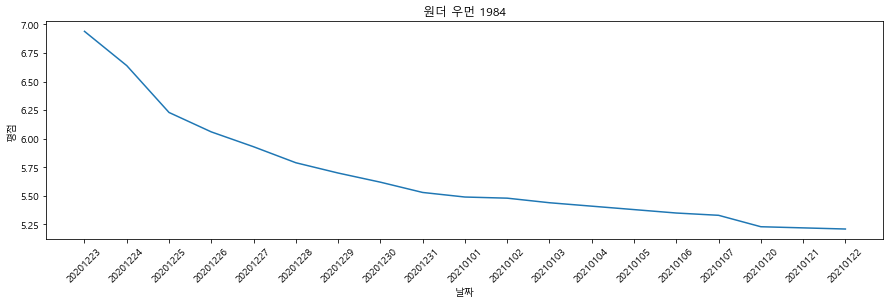

In [135]:
plt.figure(figsize=(15, 4))
plt.plot(x, y)
#  y 축의 방향을 바꾸는 함수
# plt.gca().invert_yaxis()
# x 축 데이터 라벨의 기울기를 바꿈
plt.xticks(rotation=45)
plt.title('원더 우먼 1984')
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show

## 모든 영화 평점 그래프 그리기

In [139]:
def draw_graph(name):
    x = total_movie_df[total_movie_df['영화명'] == name]['날짜']
    y = total_movie_df[total_movie_df['영화명'] == name]['평점']

    plt.figure(figsize=(15, 4))
    plt.plot(x, y)
    #  y 축의 방향을 바꾸는 함수
    # plt.gca().invert_yaxis()
    # x 축 데이터 라벨의 기울기를 바꿈
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel('날짜')
    plt.ylabel('평점')
    plt.show

<ipython-input-139-12c74c3bbc8e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 4))


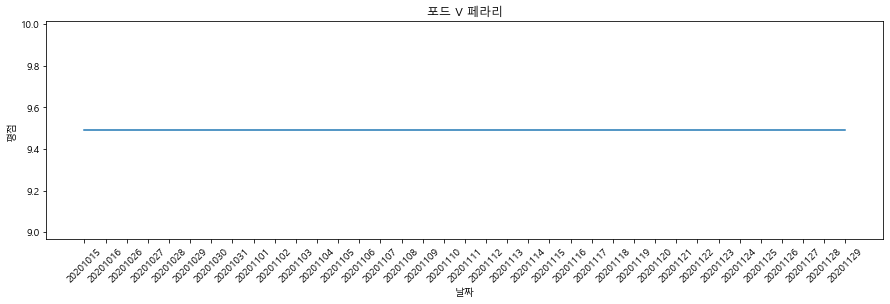

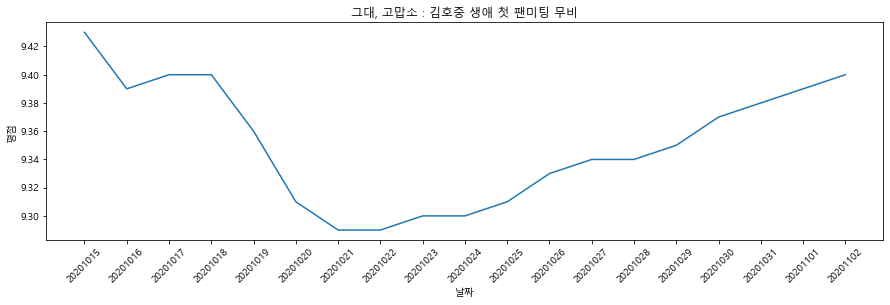

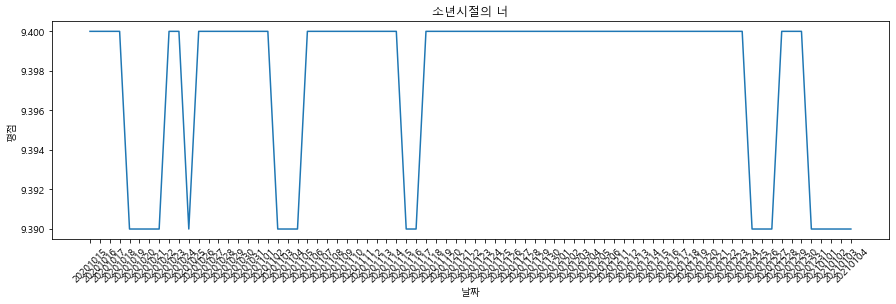

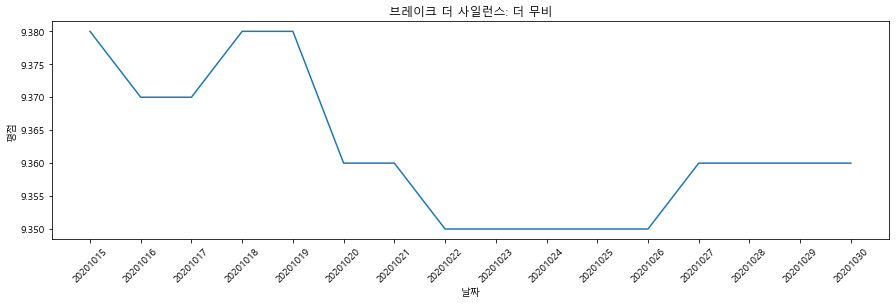

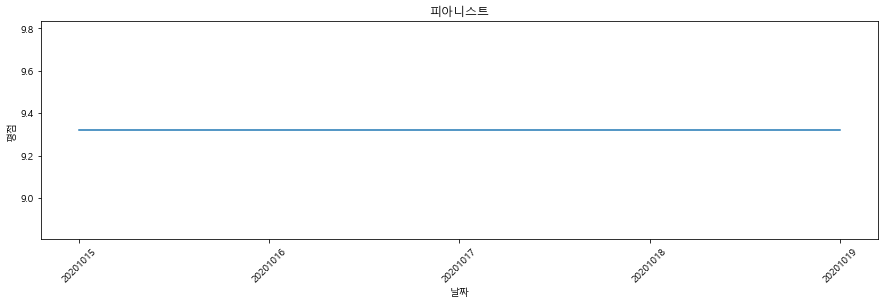

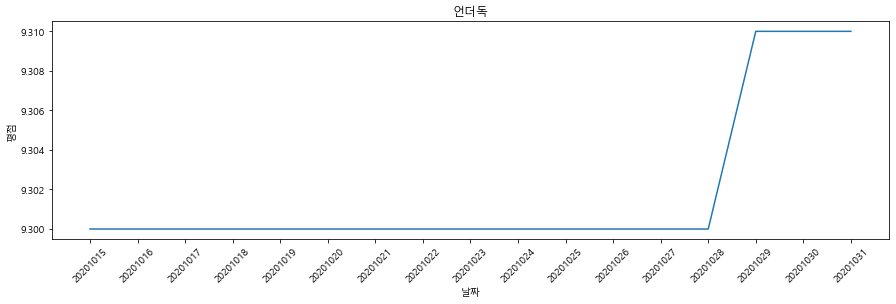

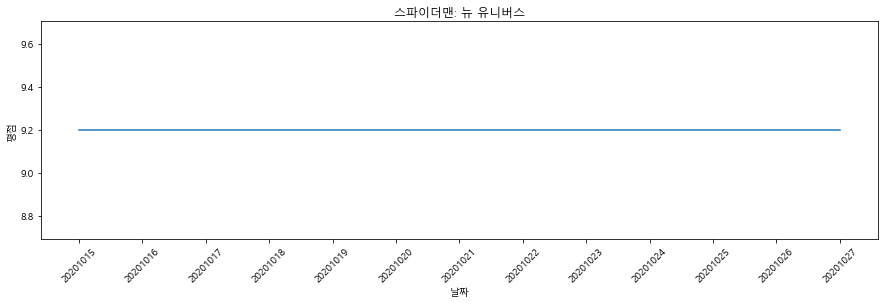

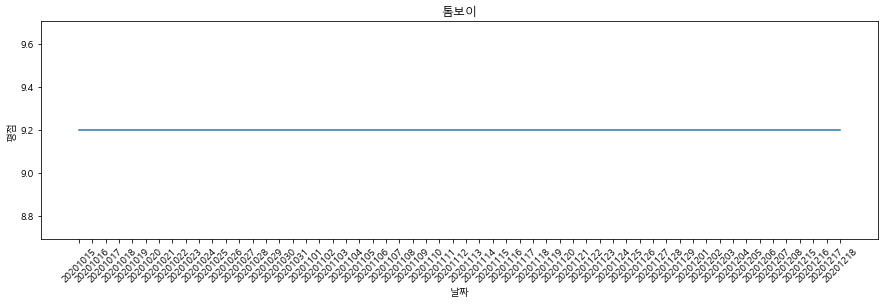

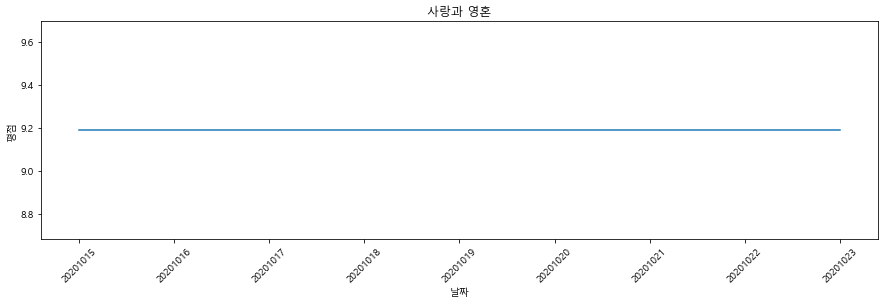

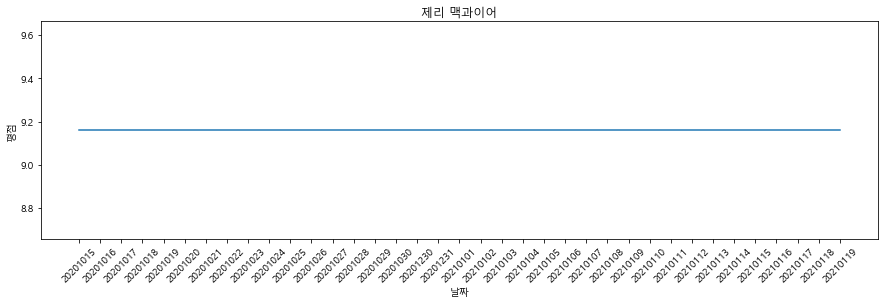

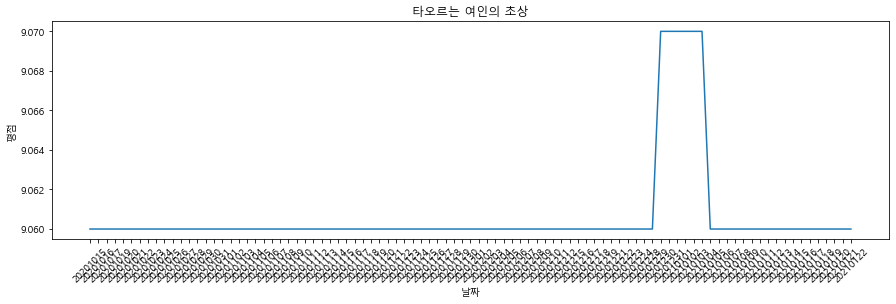

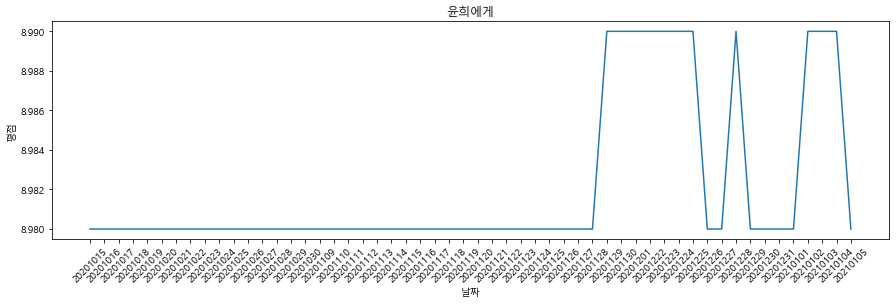

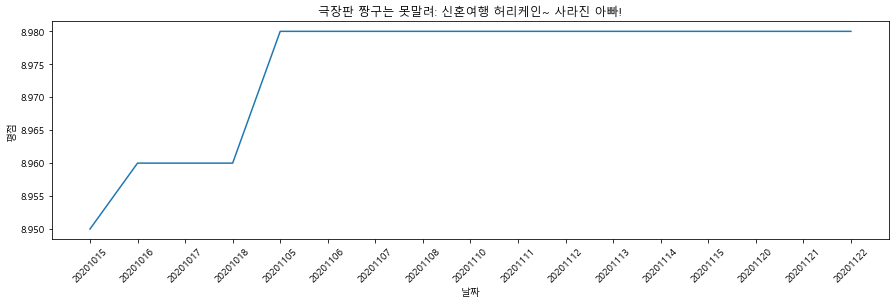

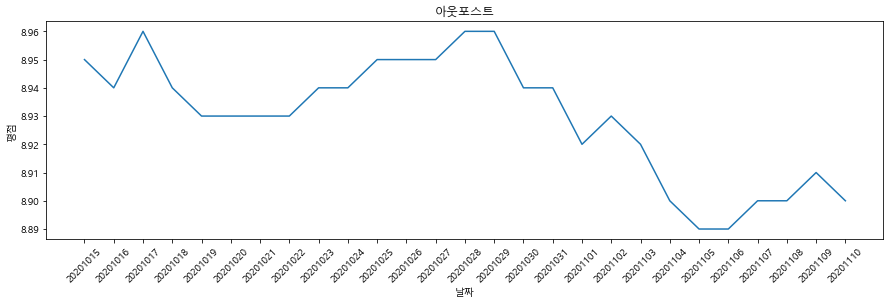

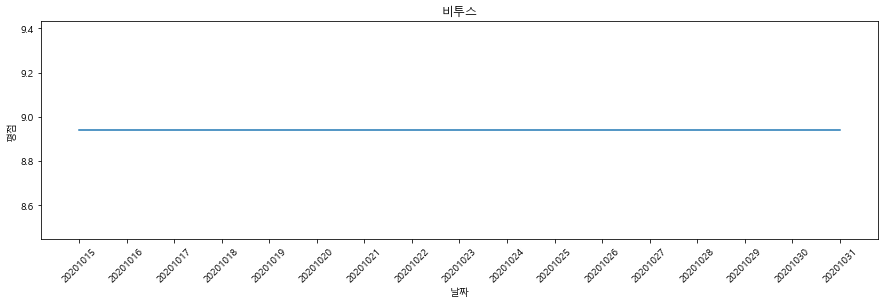

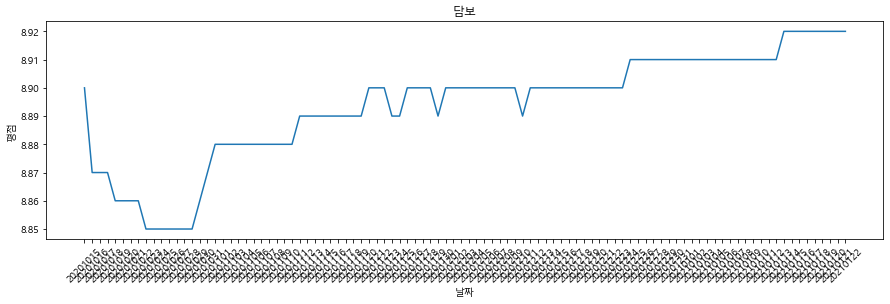

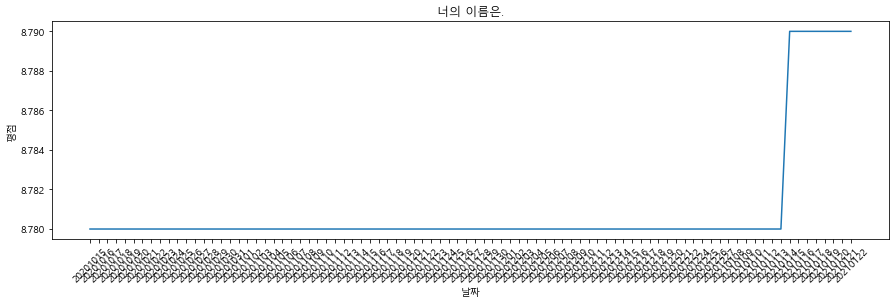

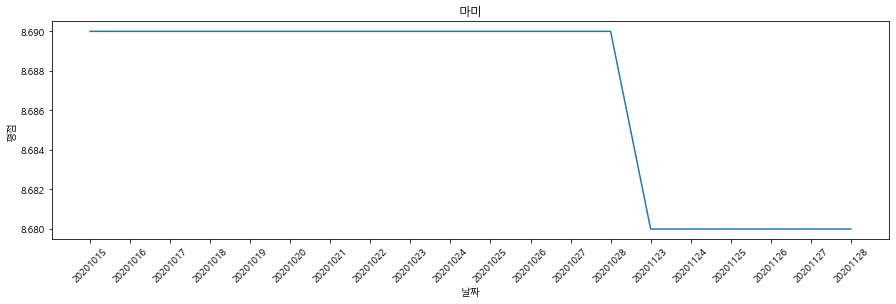

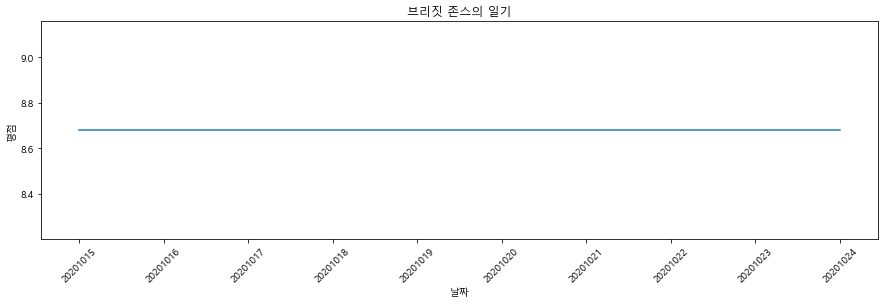

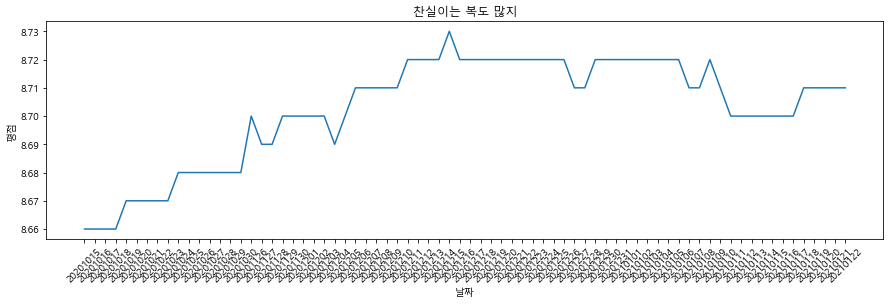

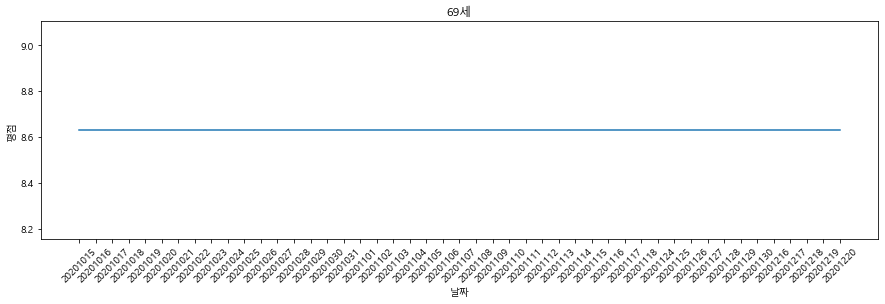

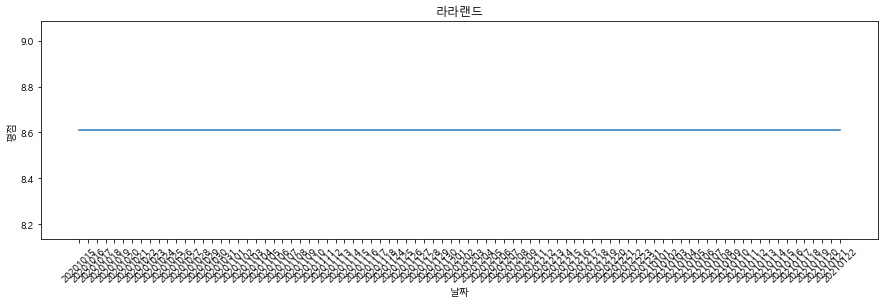

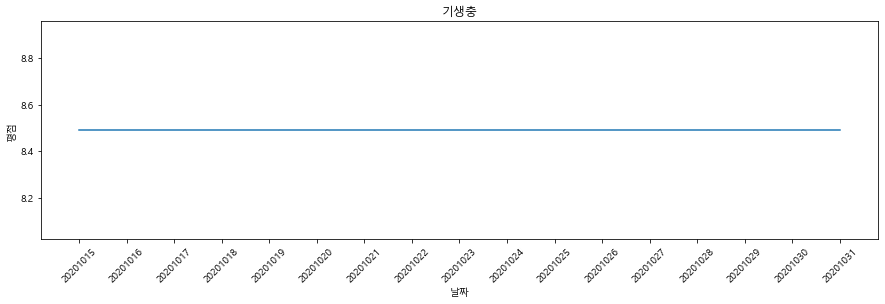

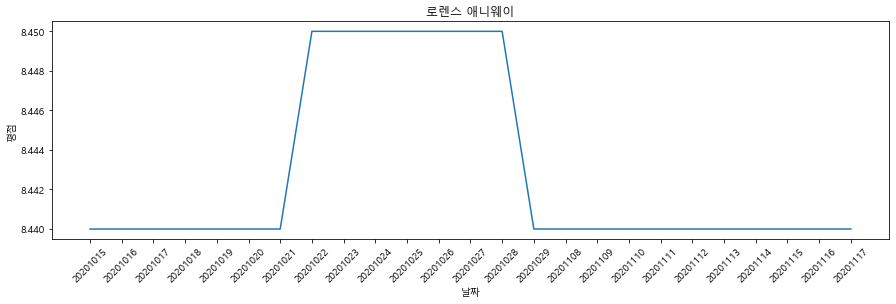

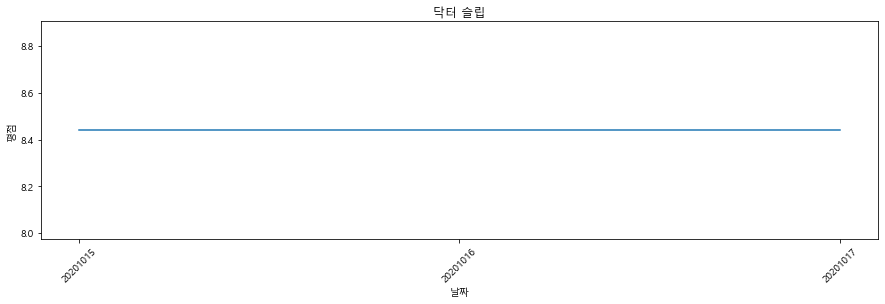

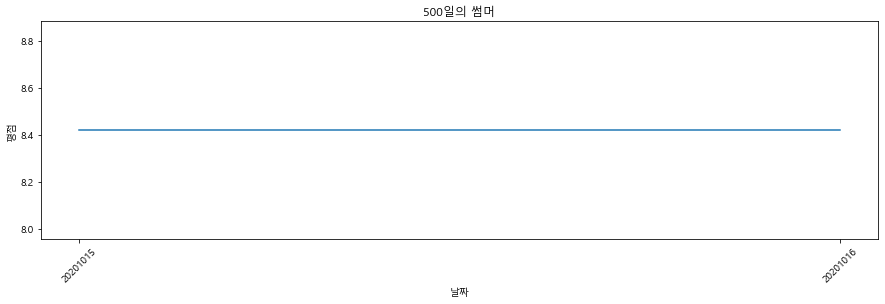

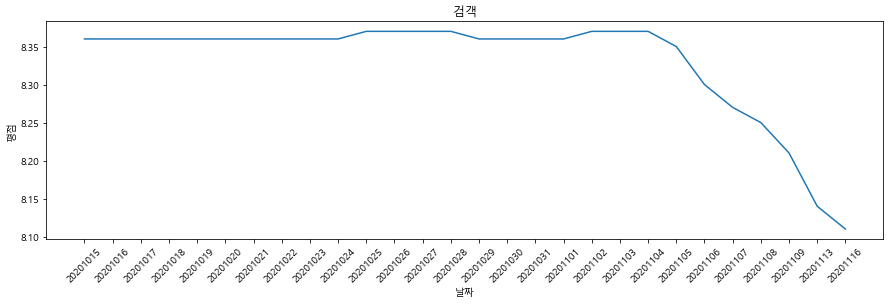

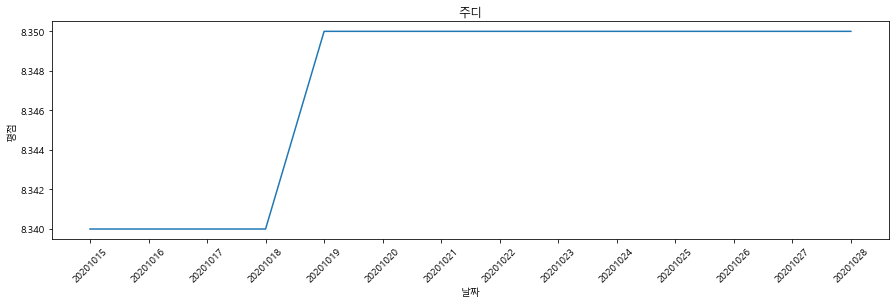

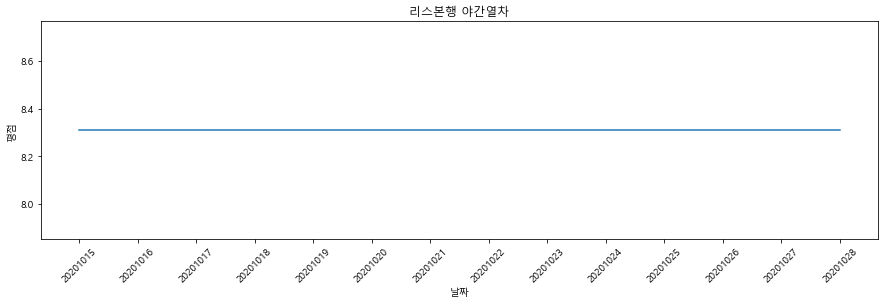

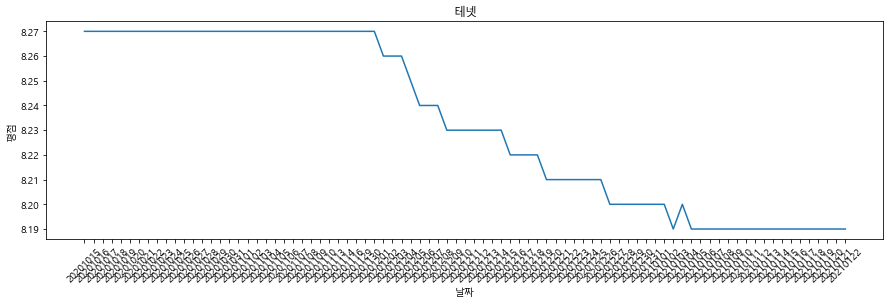

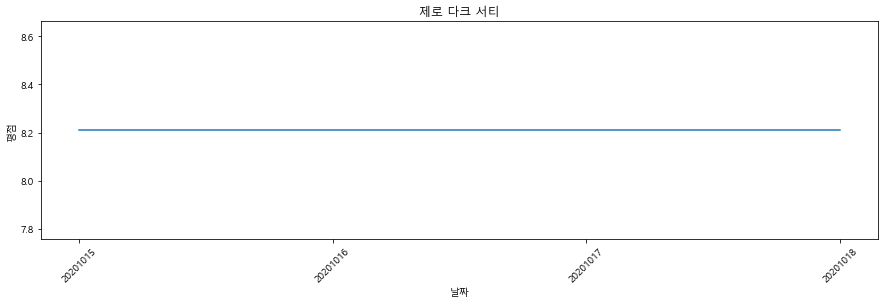

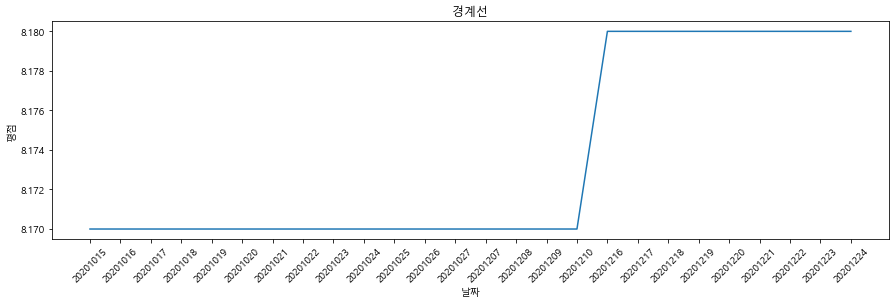

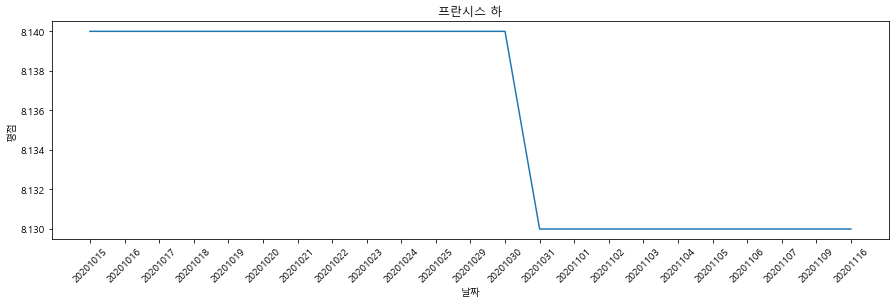

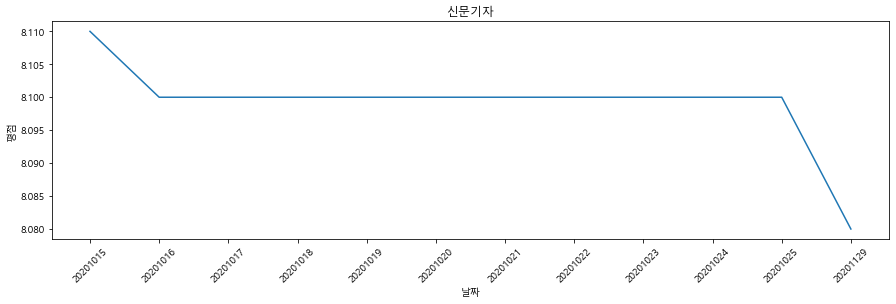

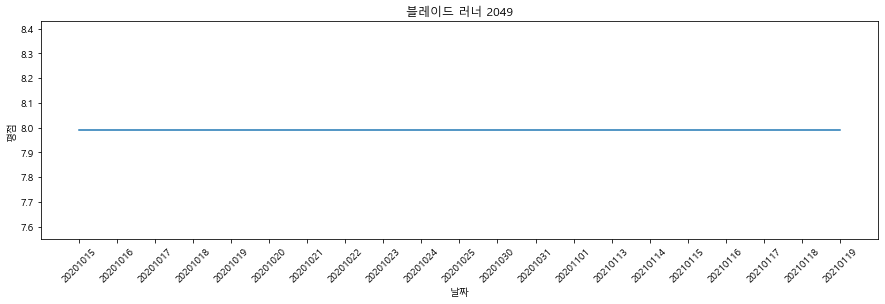

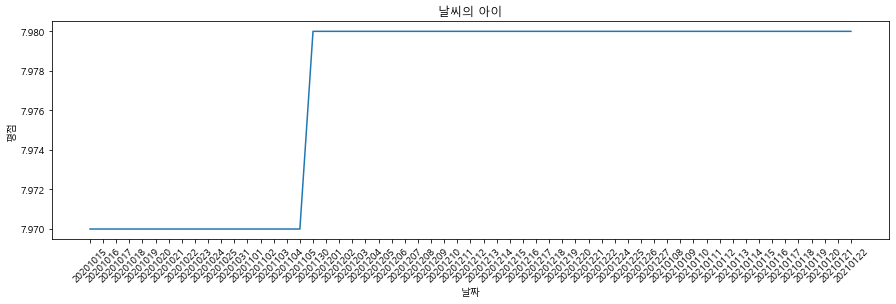

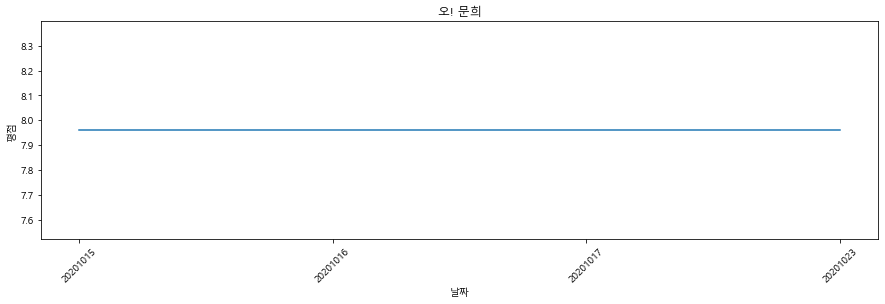

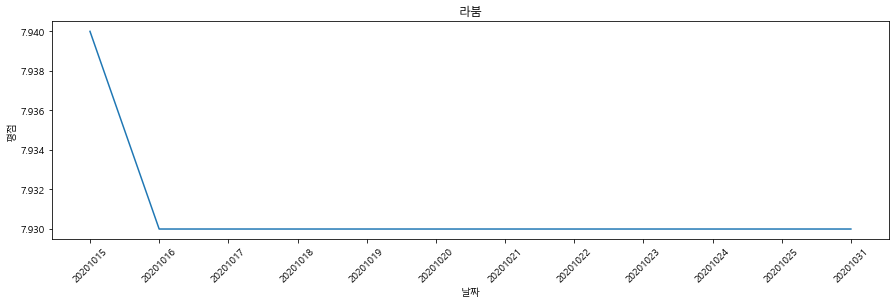

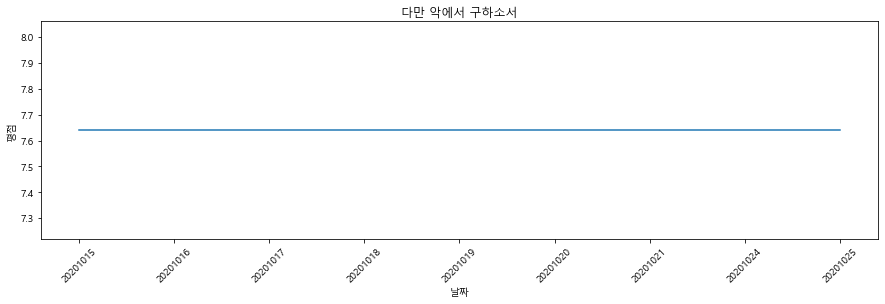

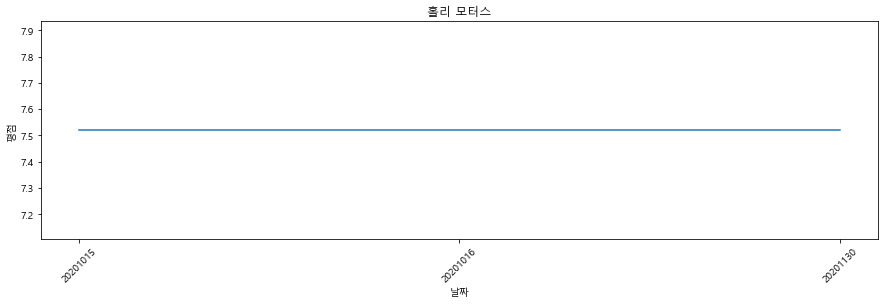

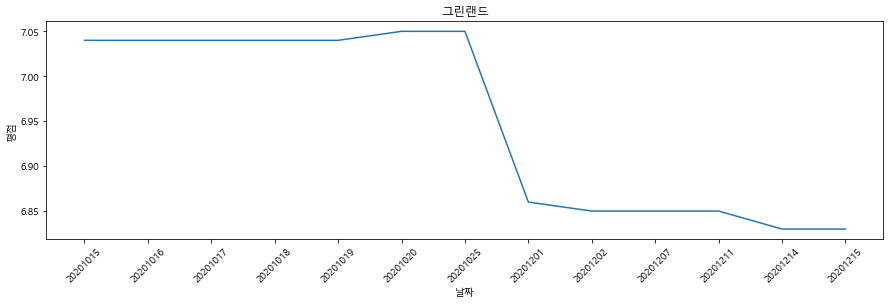

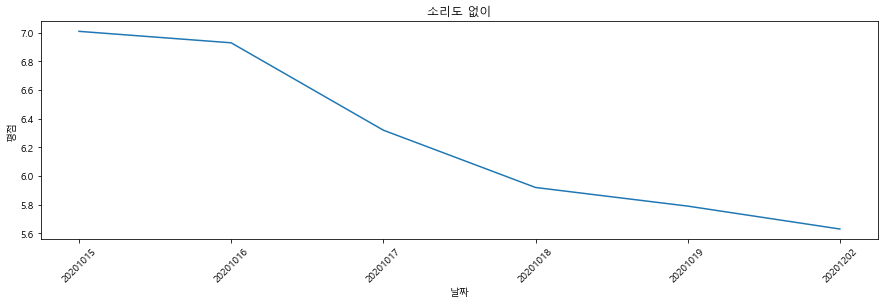

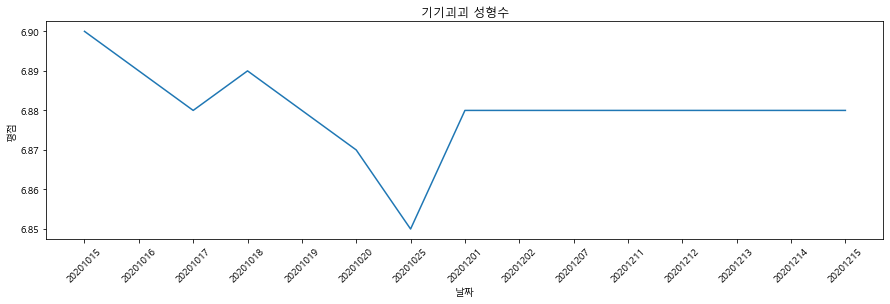

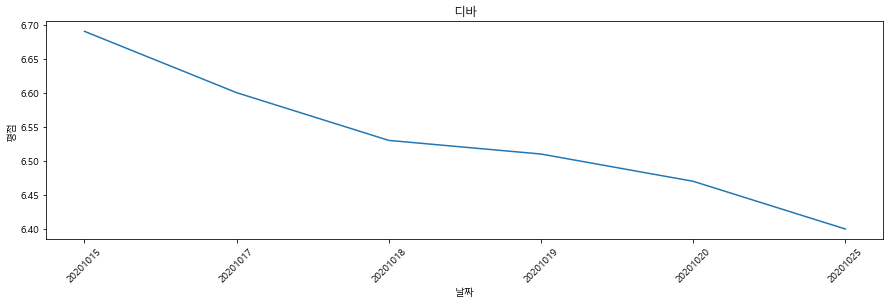

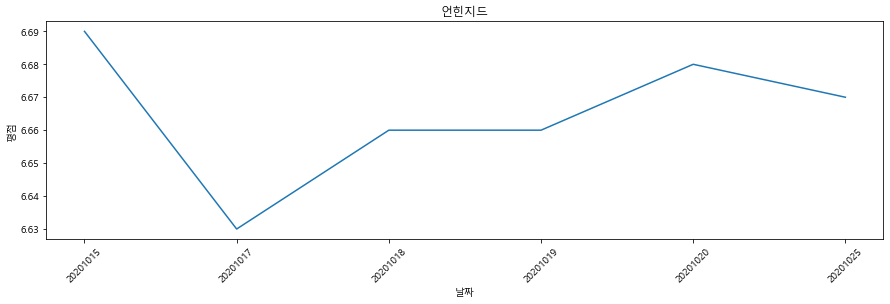

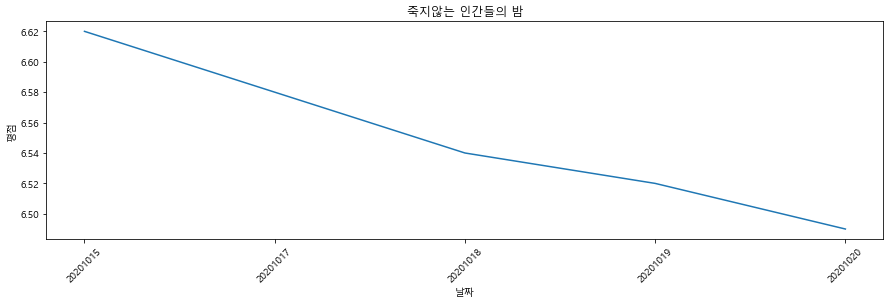

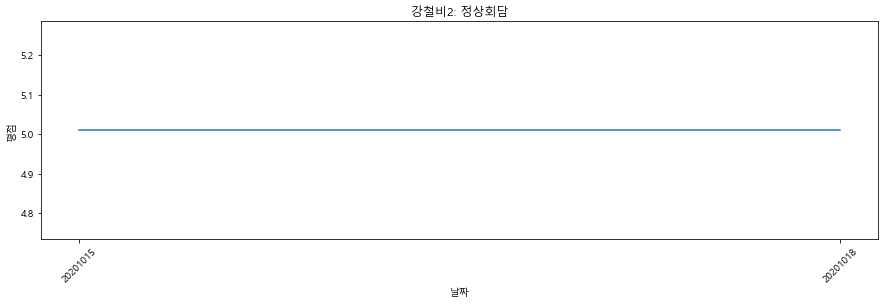

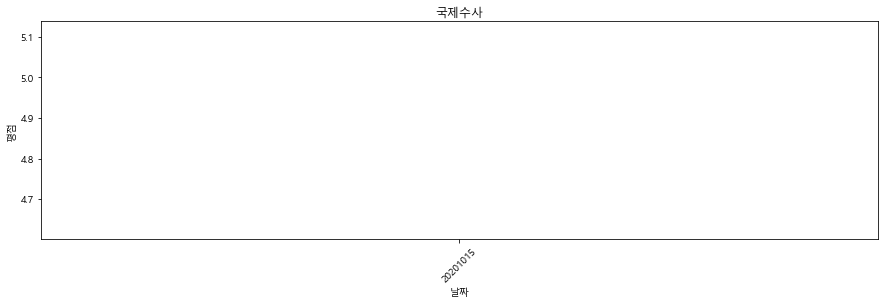

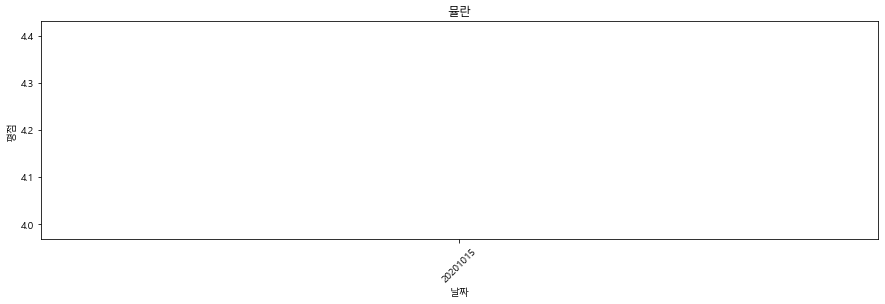

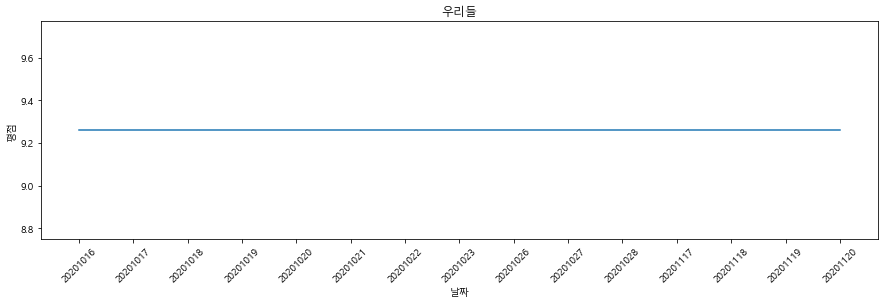

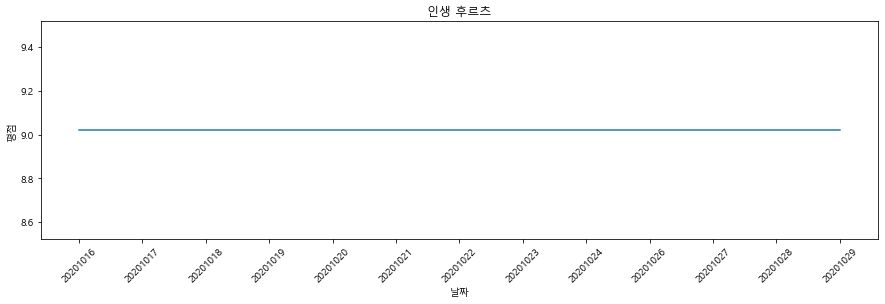

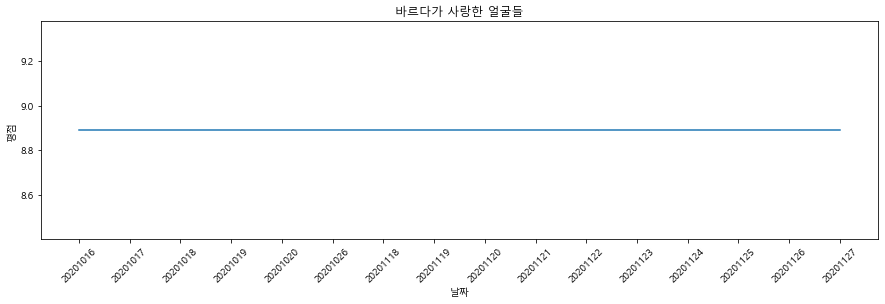

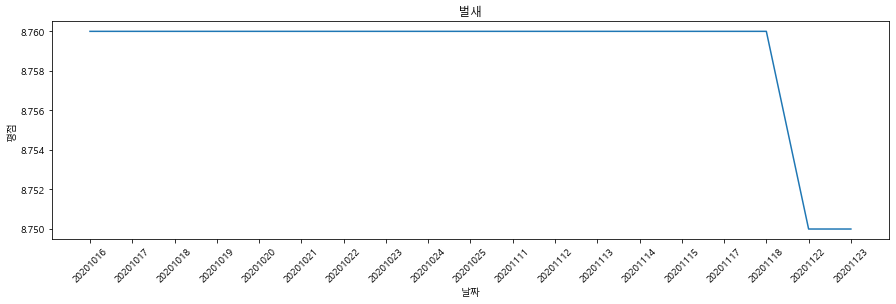

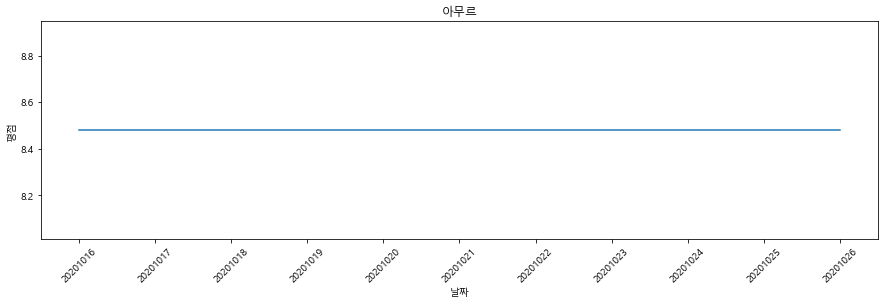

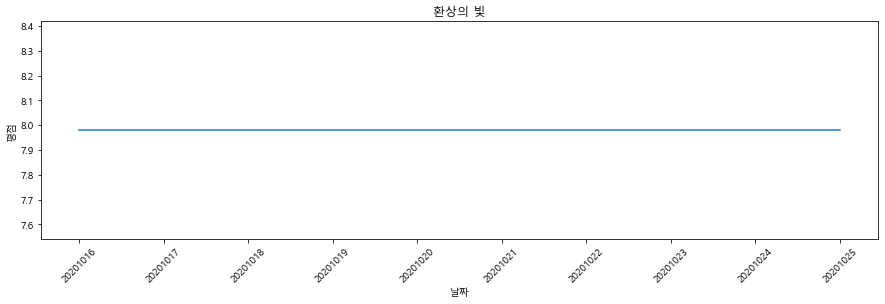

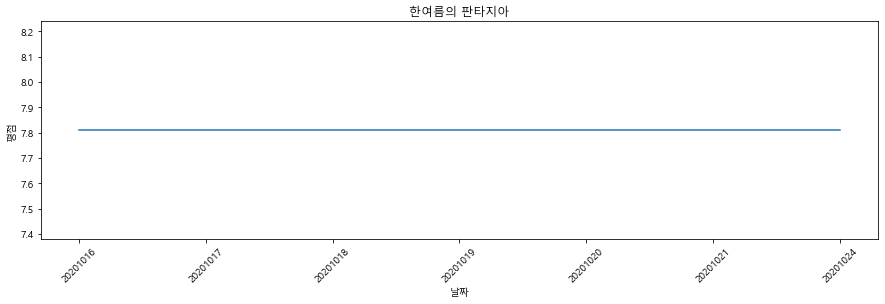

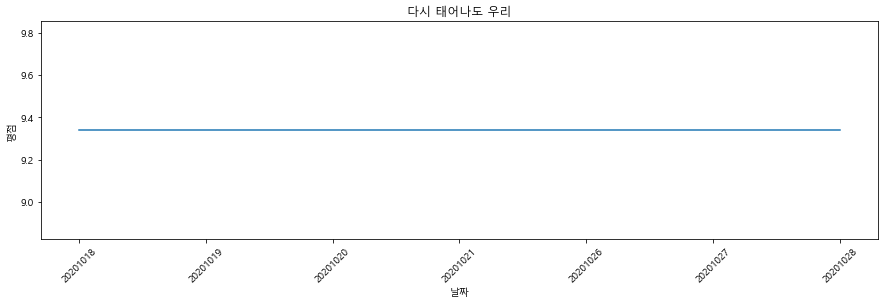

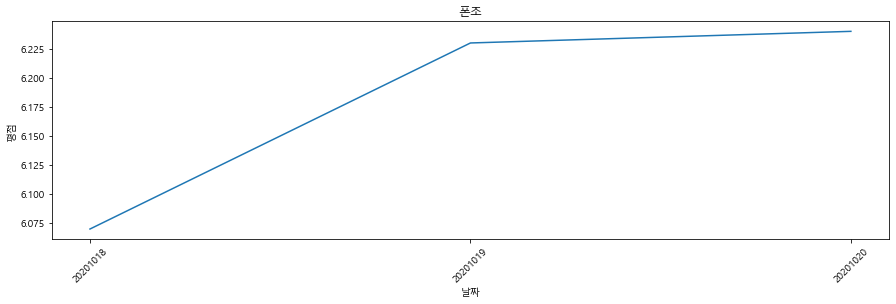

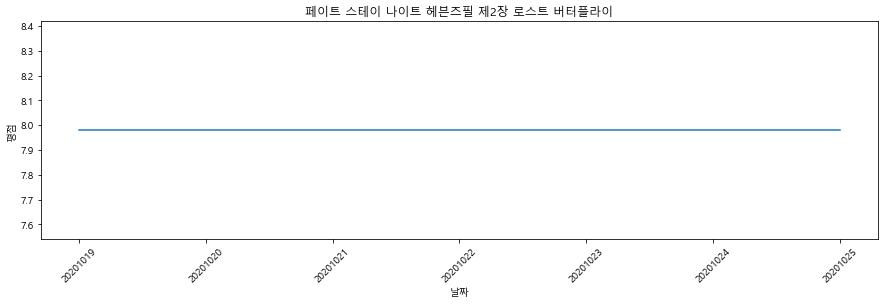

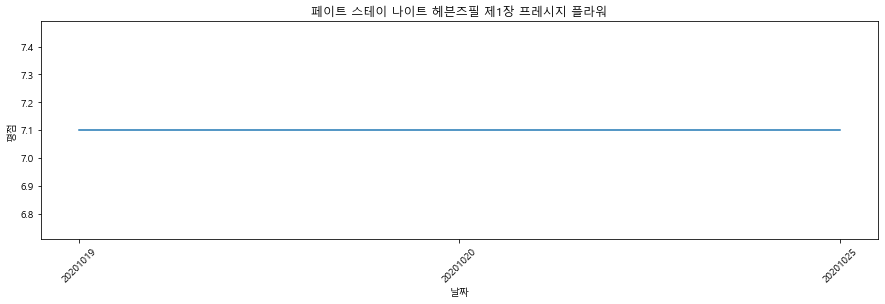

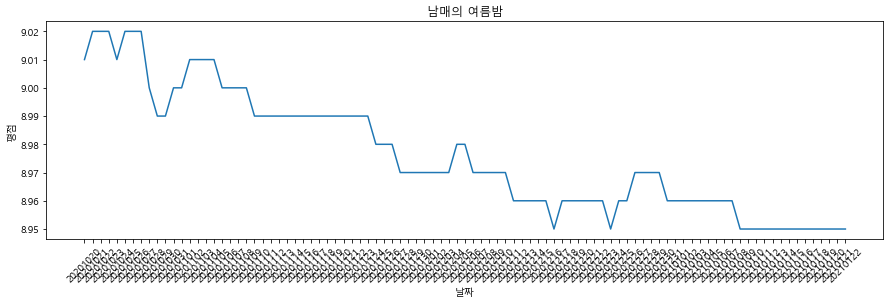

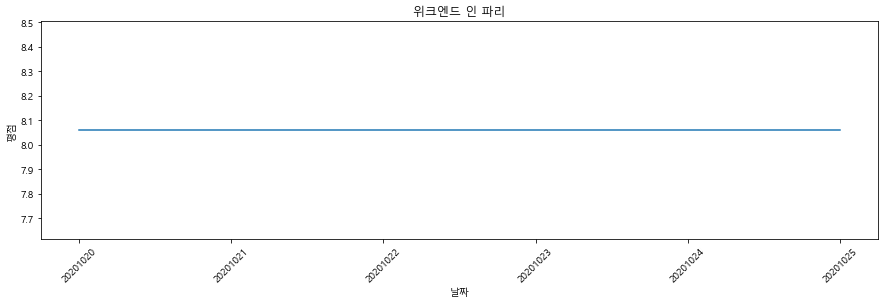

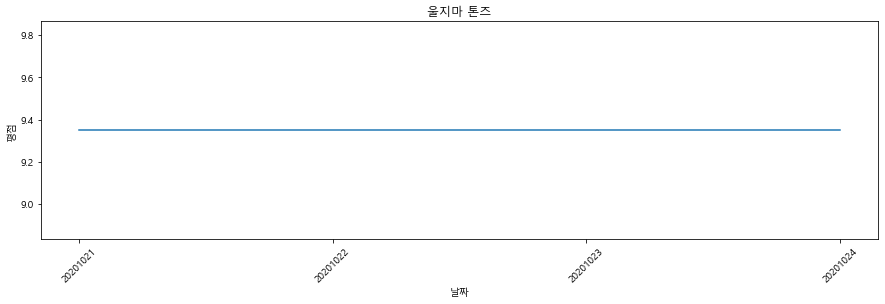

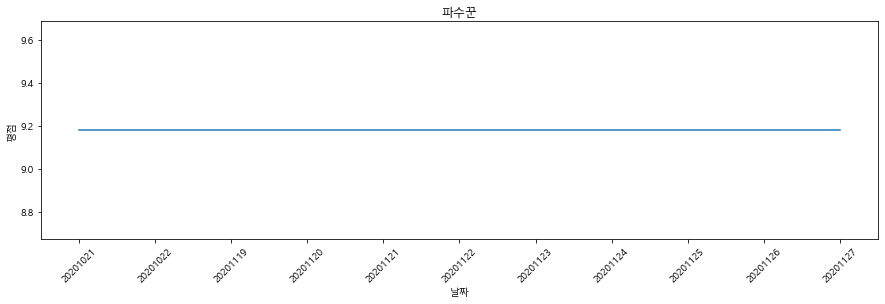

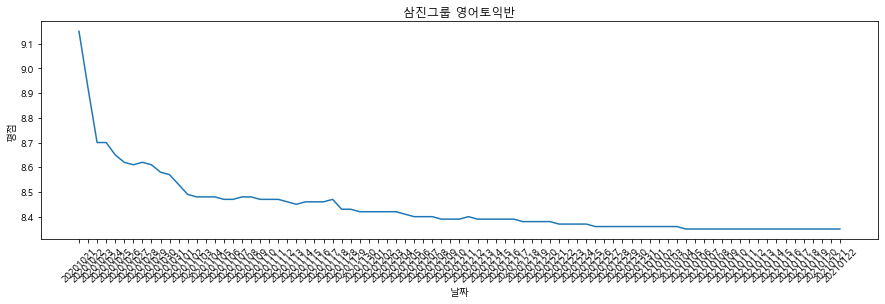

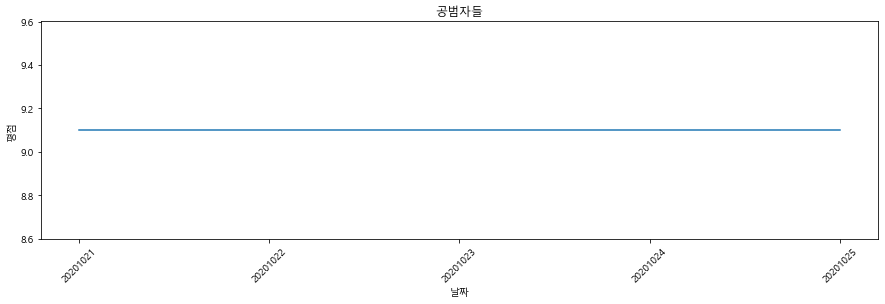

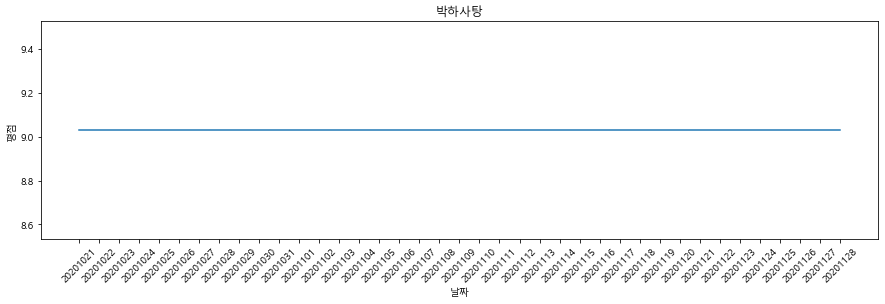

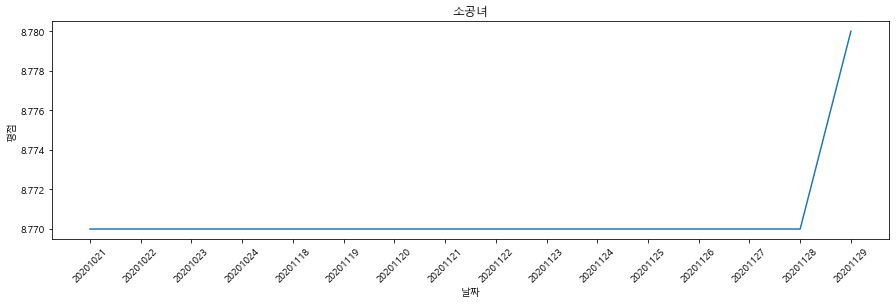

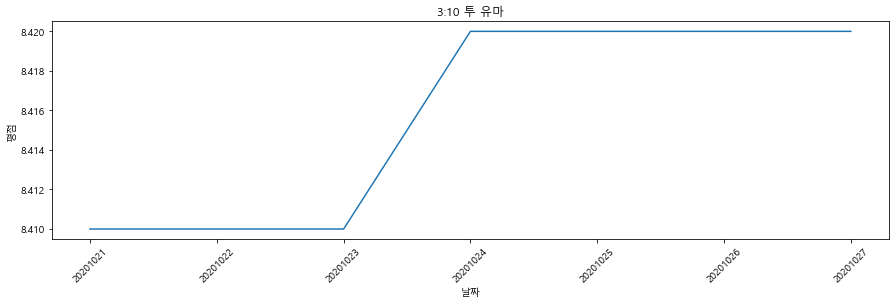

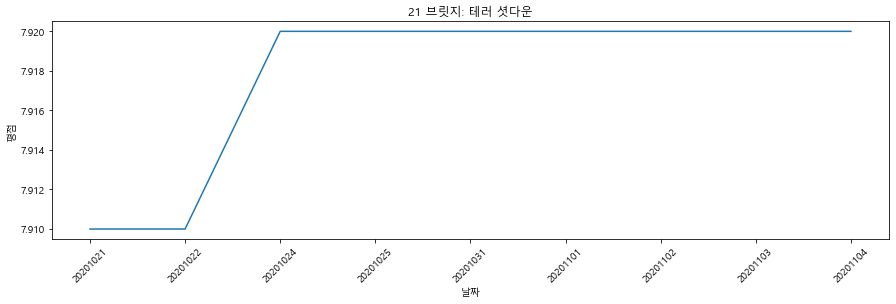

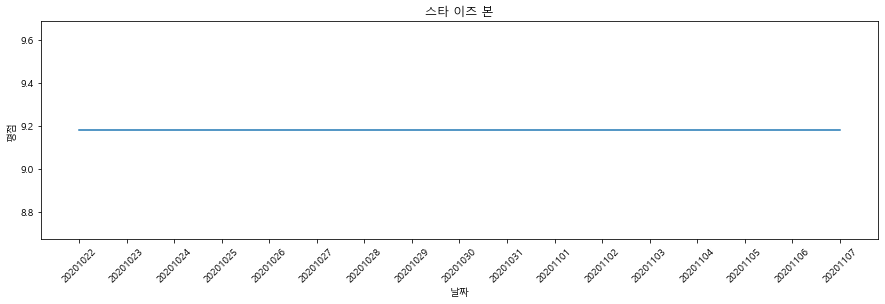

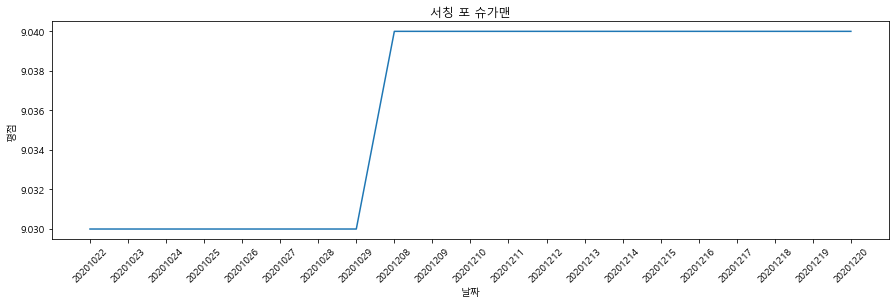

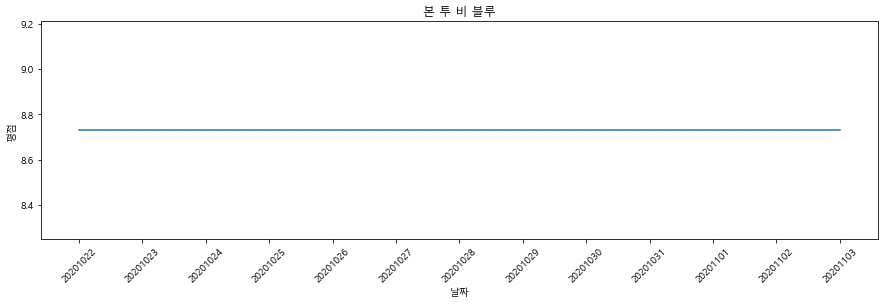

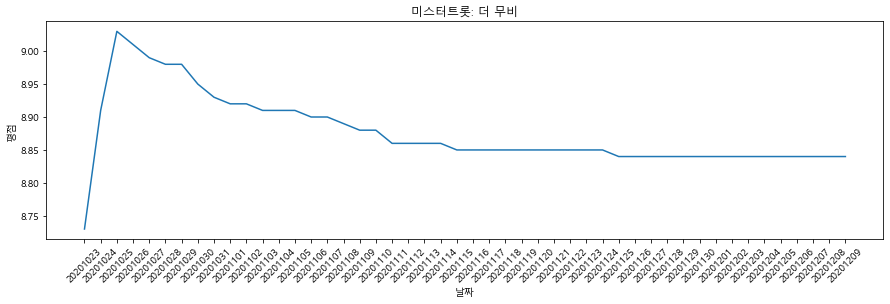

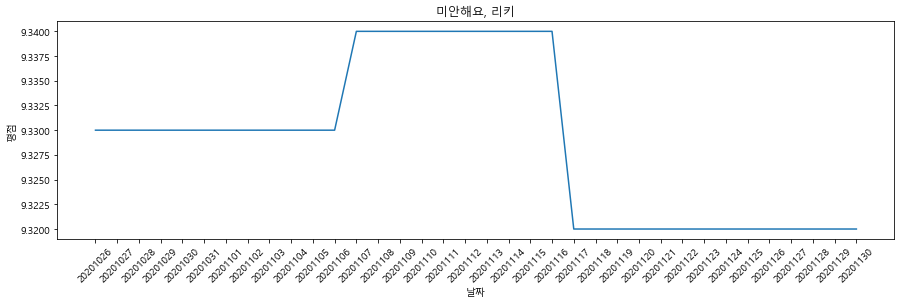

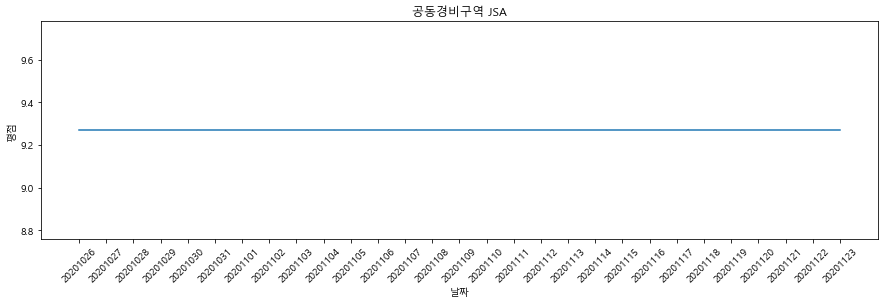

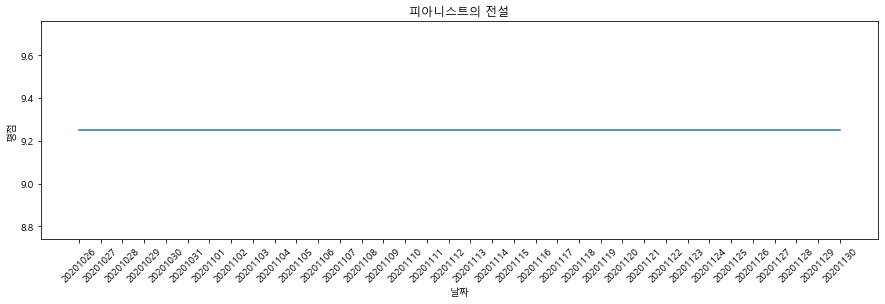

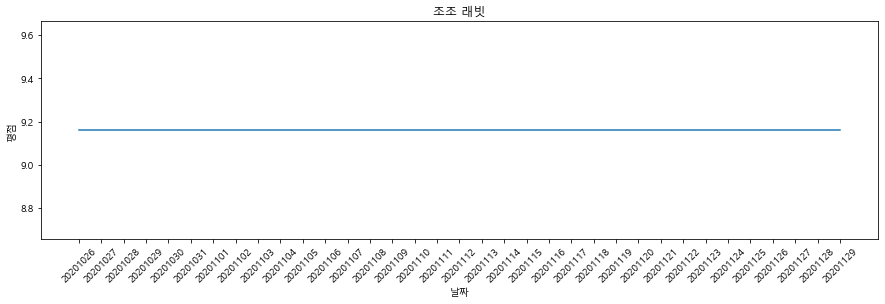

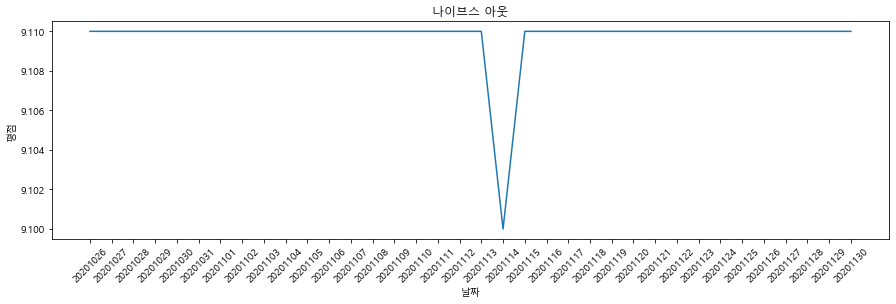

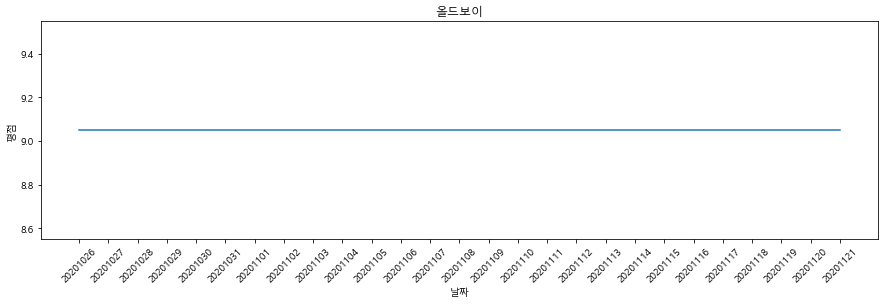

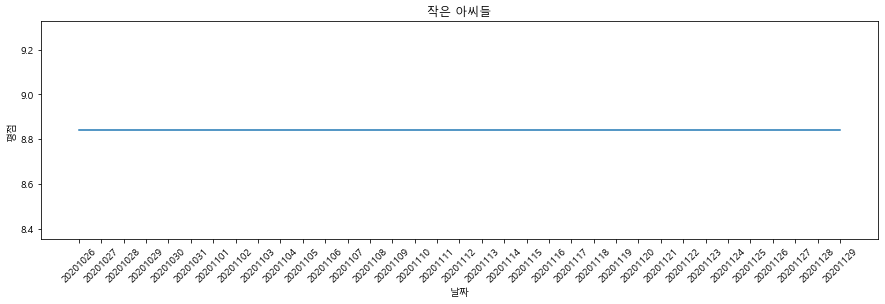

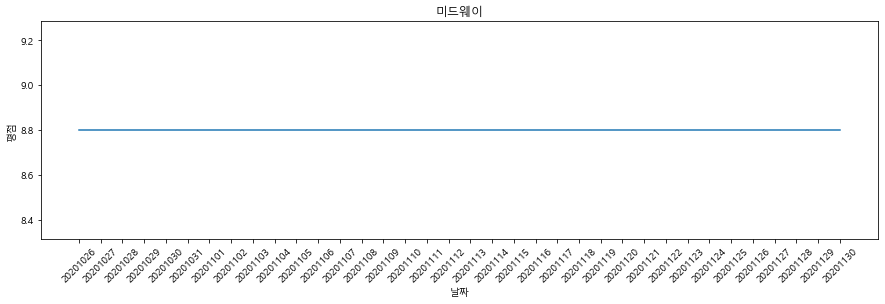

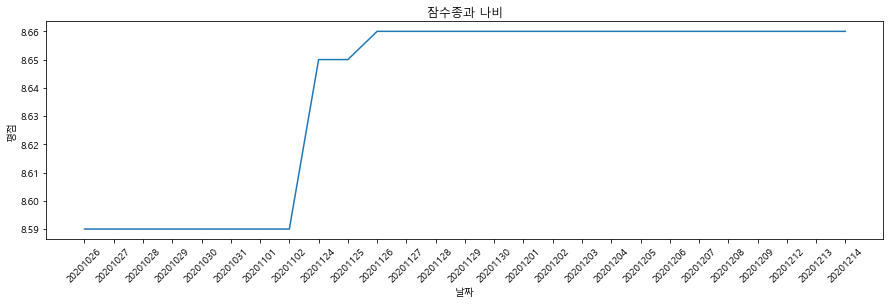

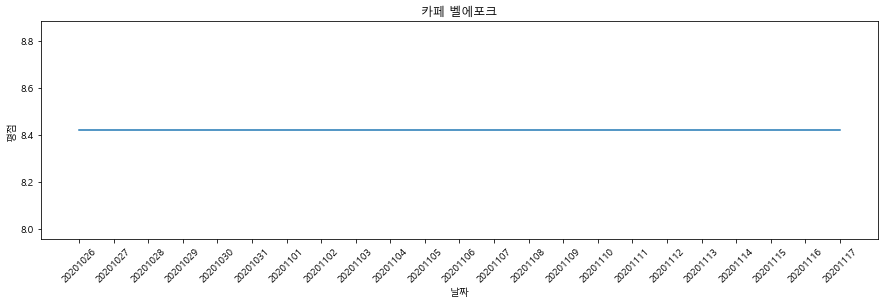

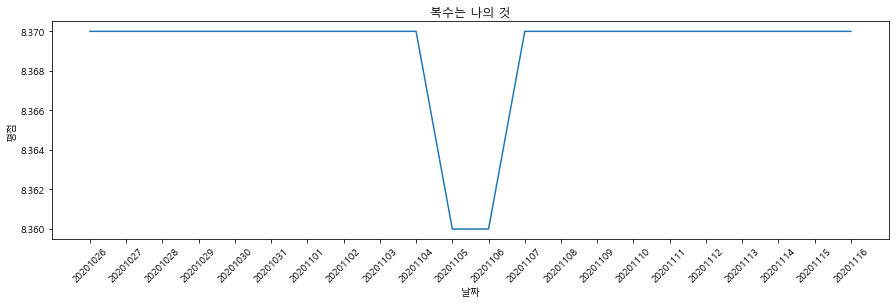

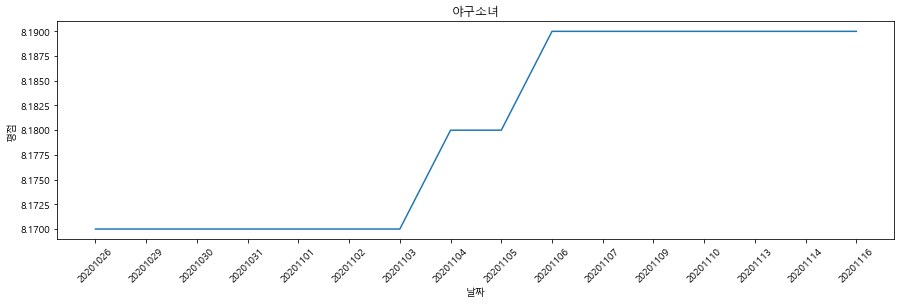

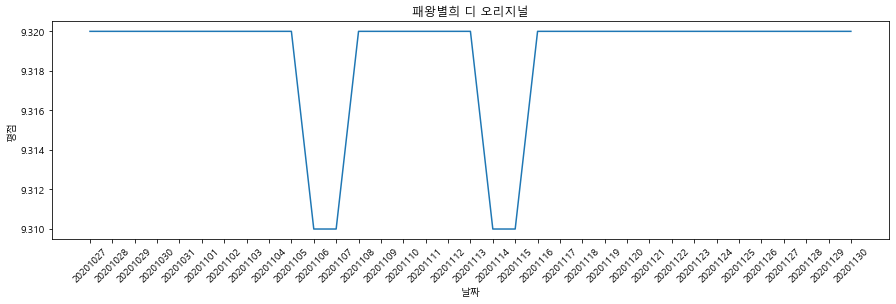

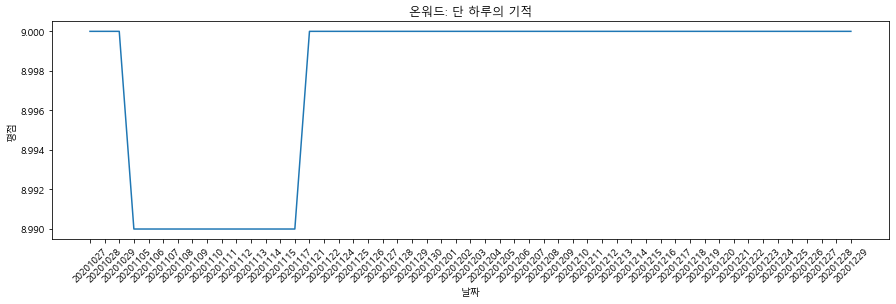

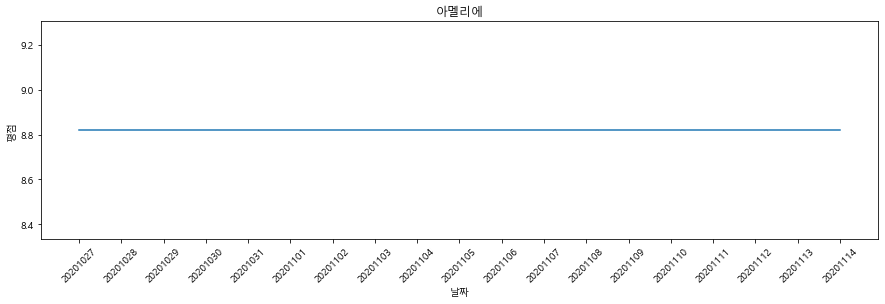

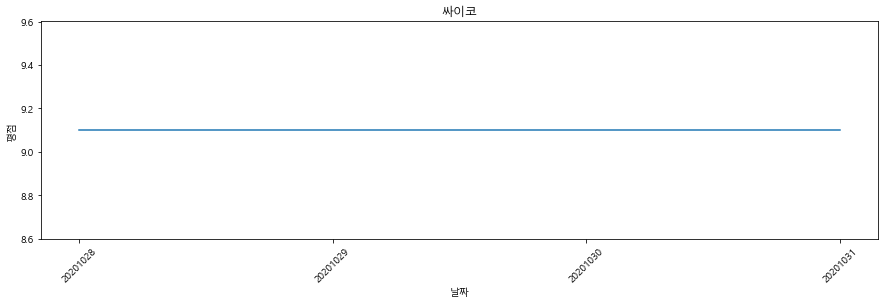

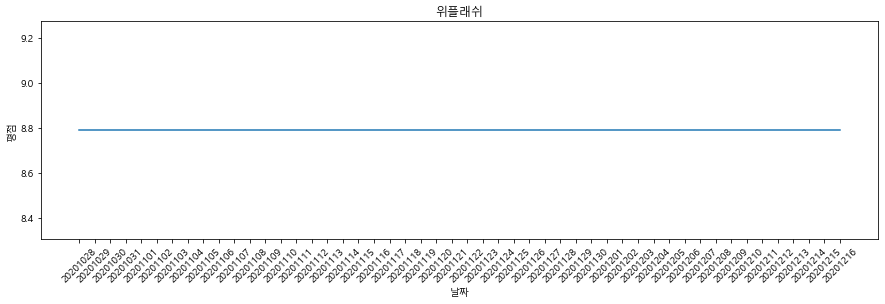

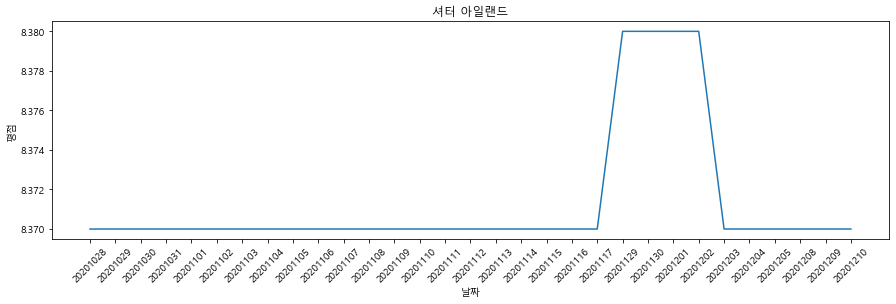

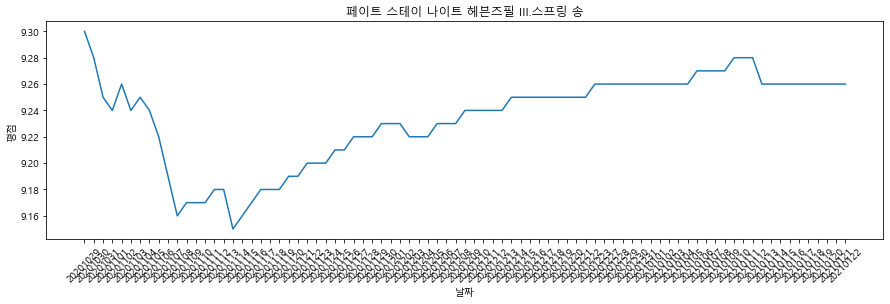

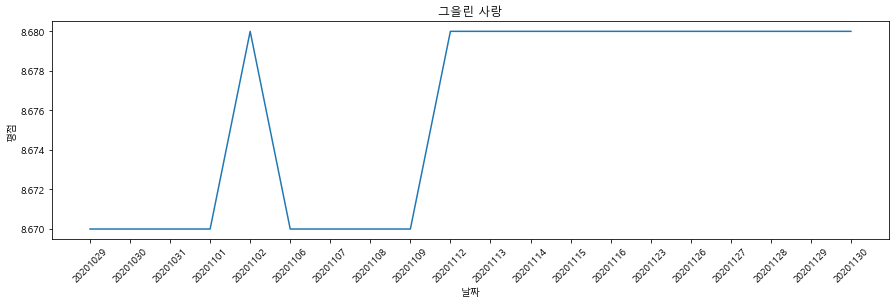

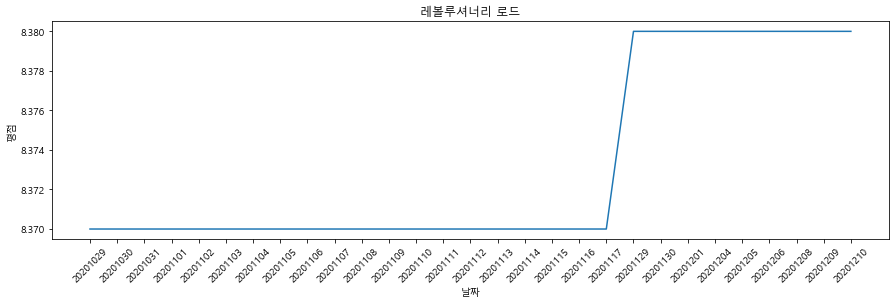

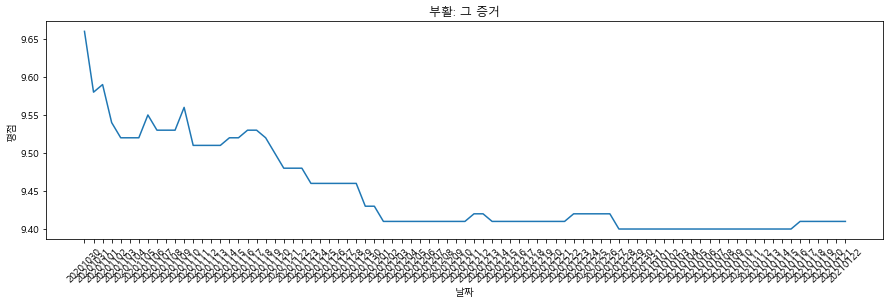

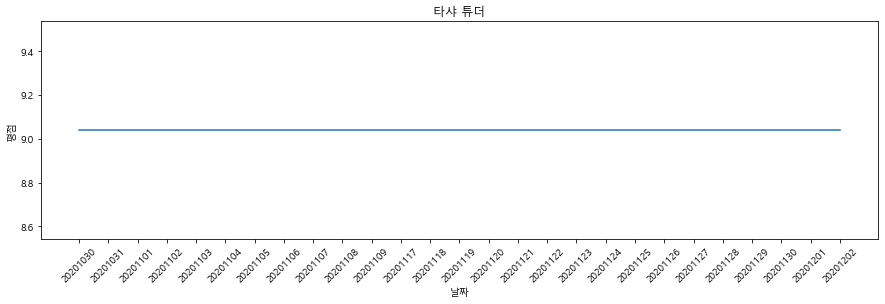

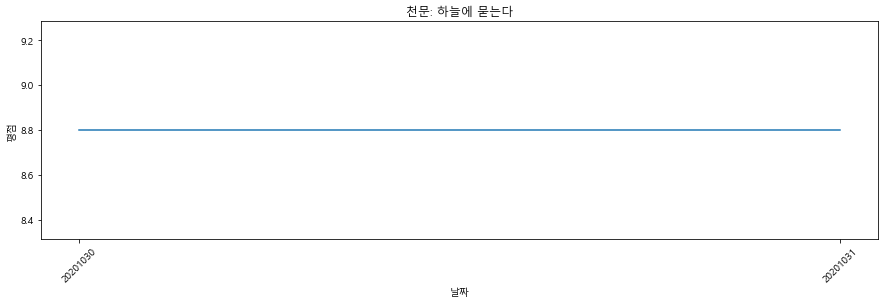

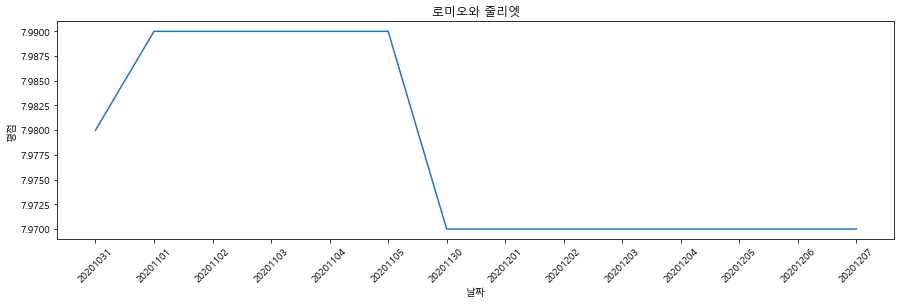

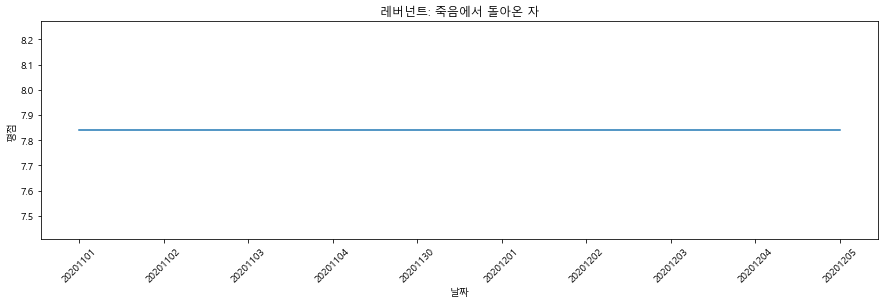

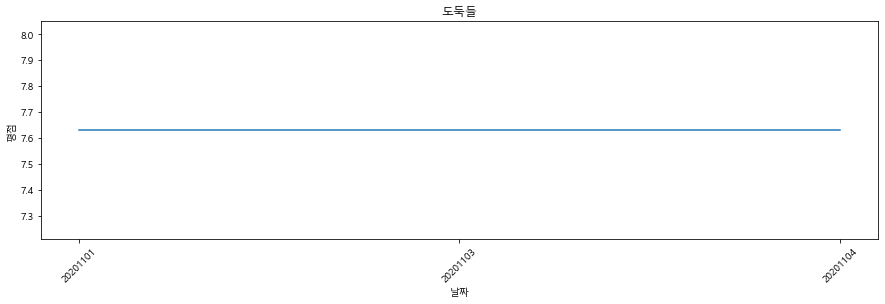

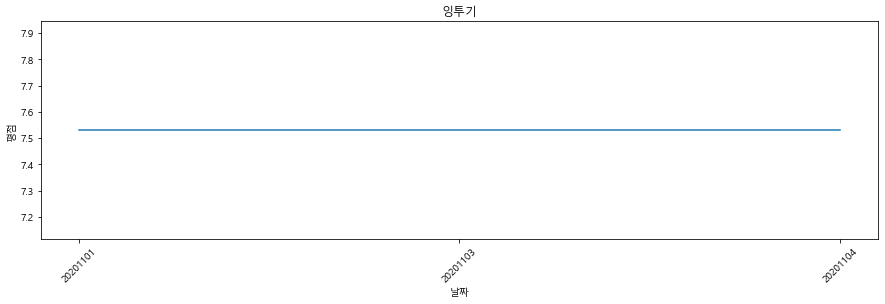

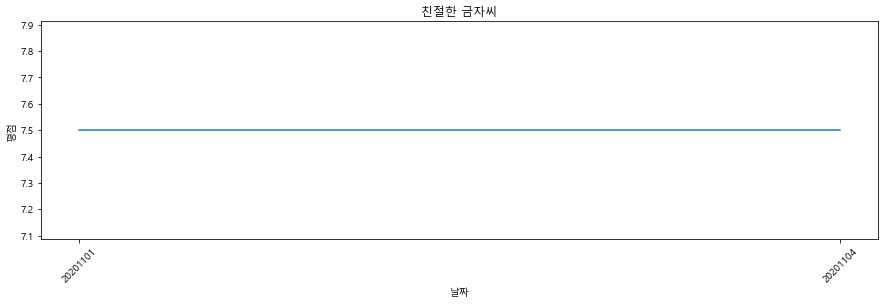

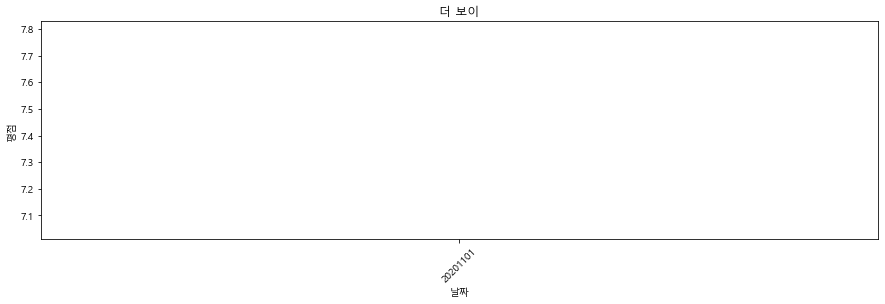

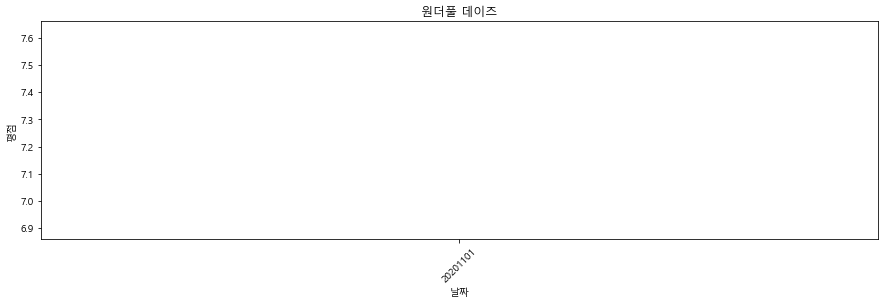

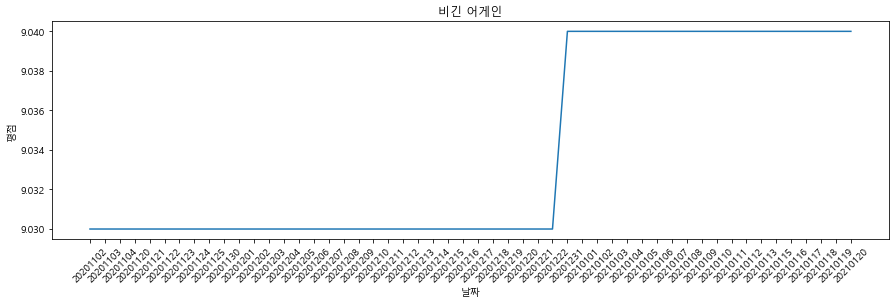

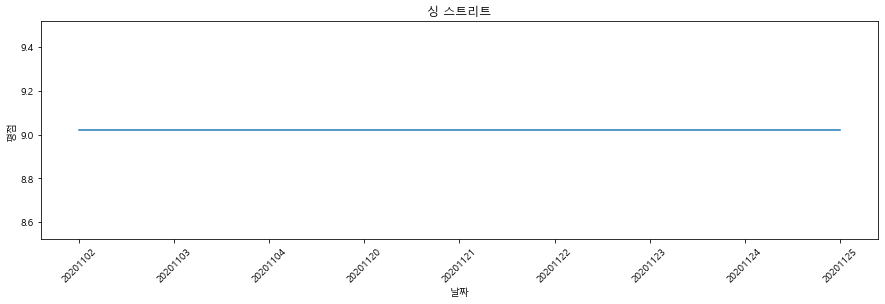

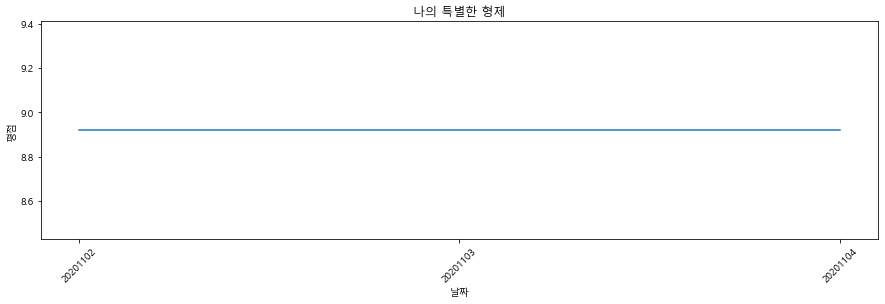

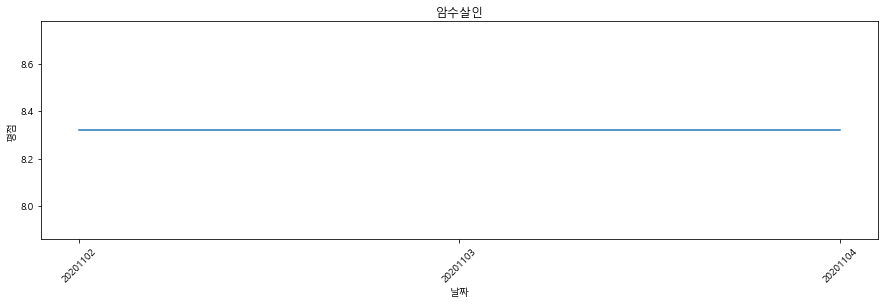

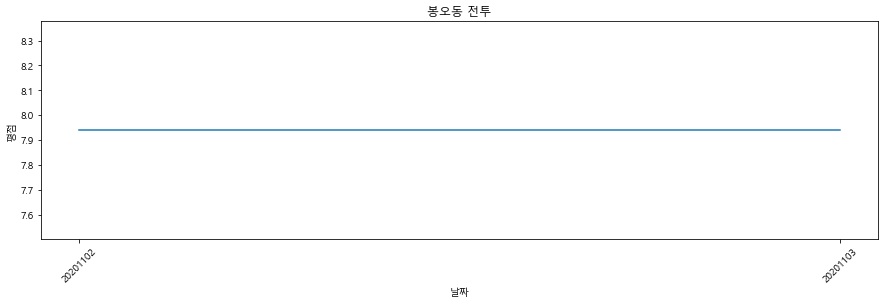

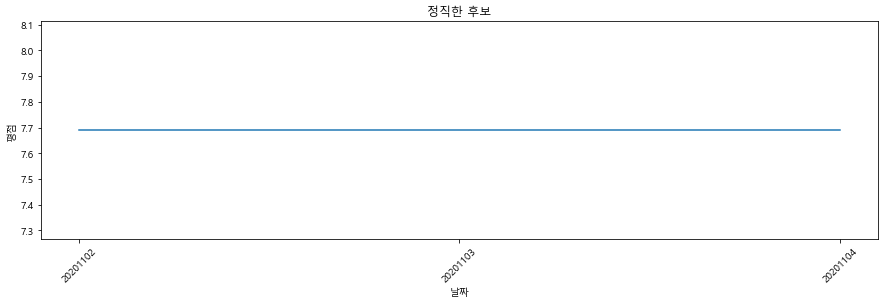

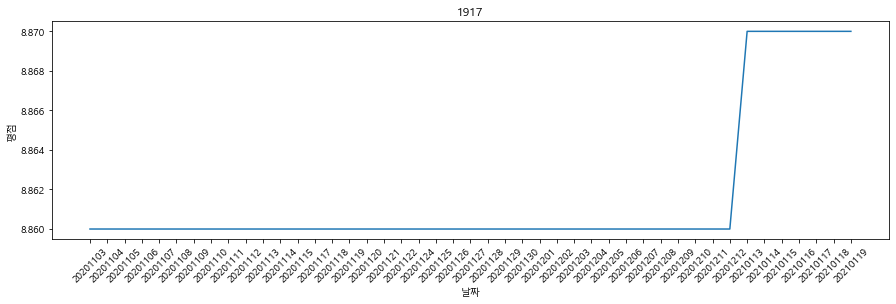

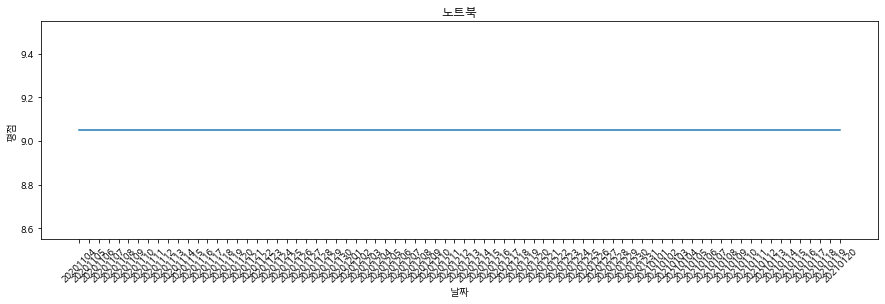

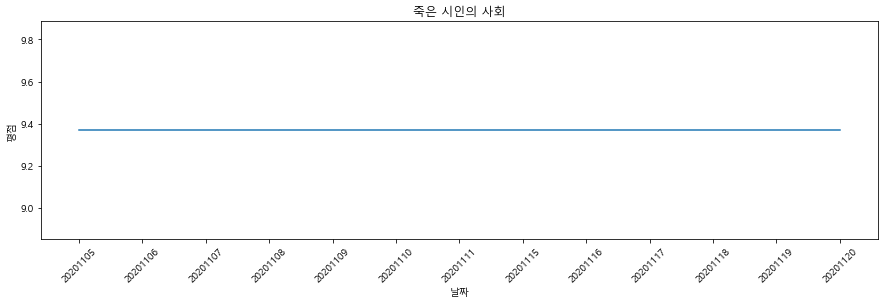

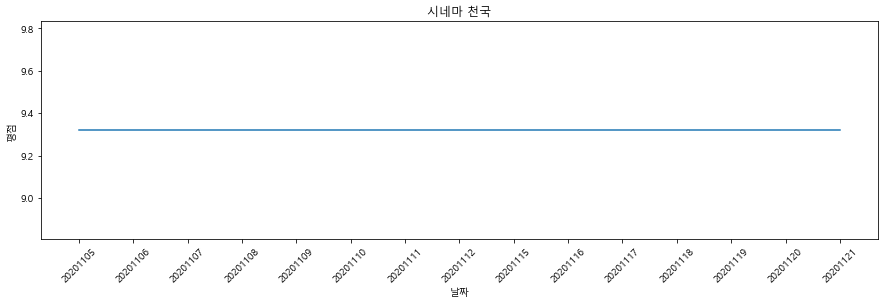

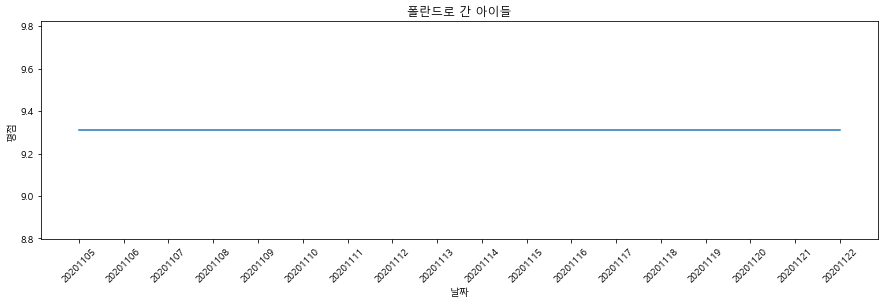

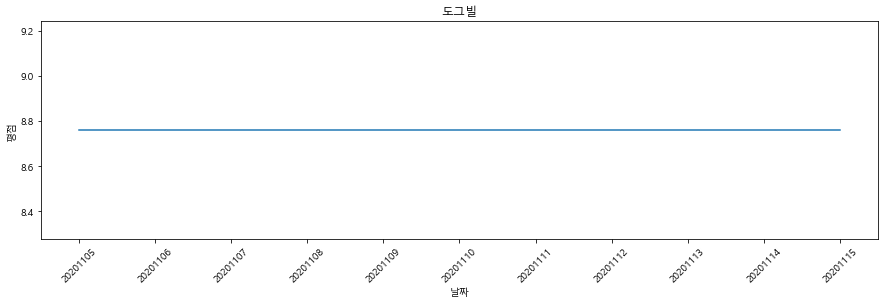

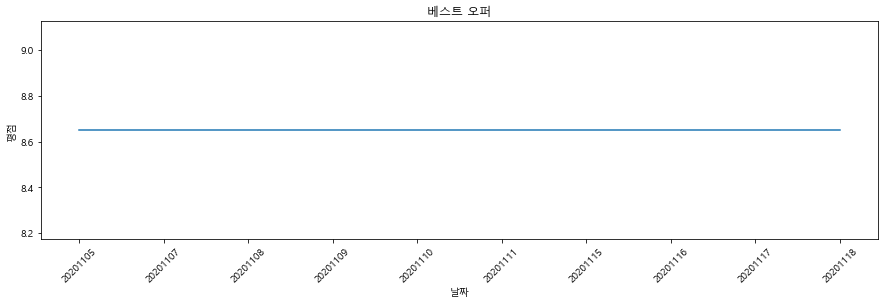

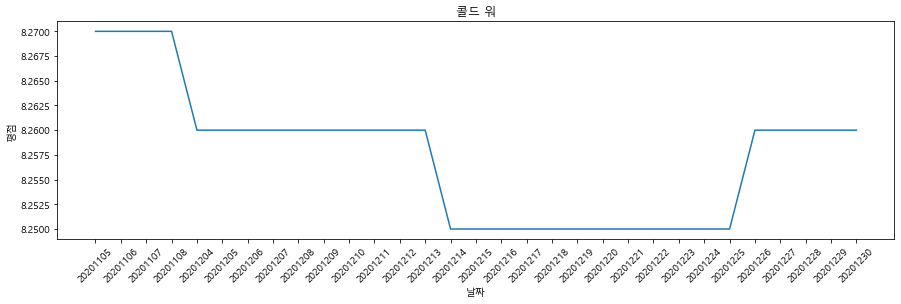

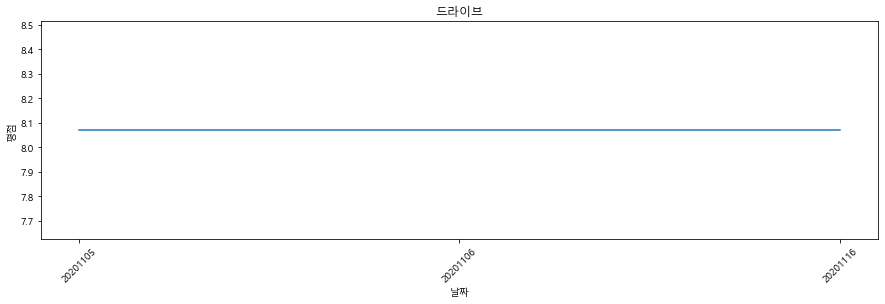

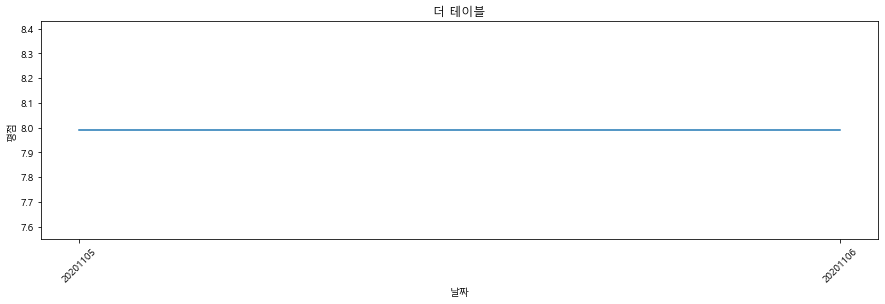

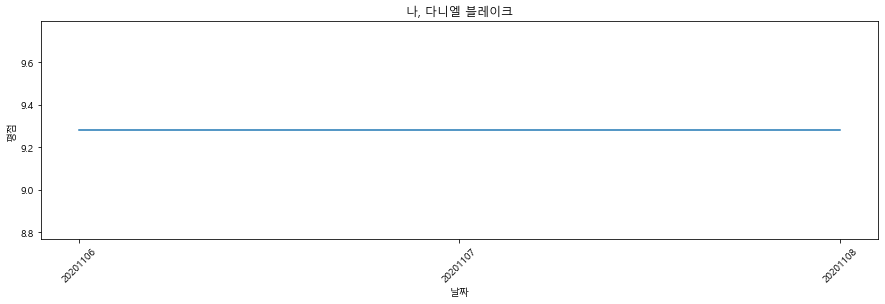

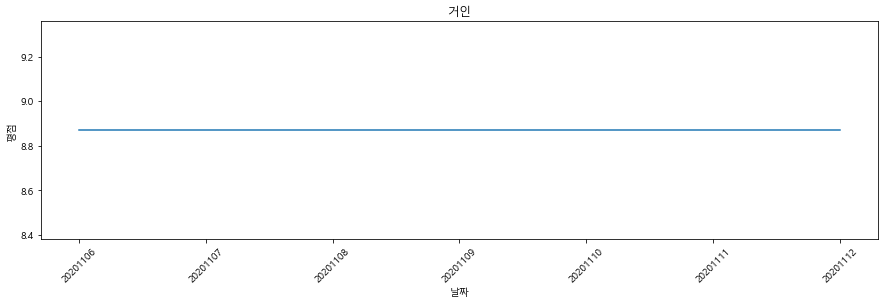

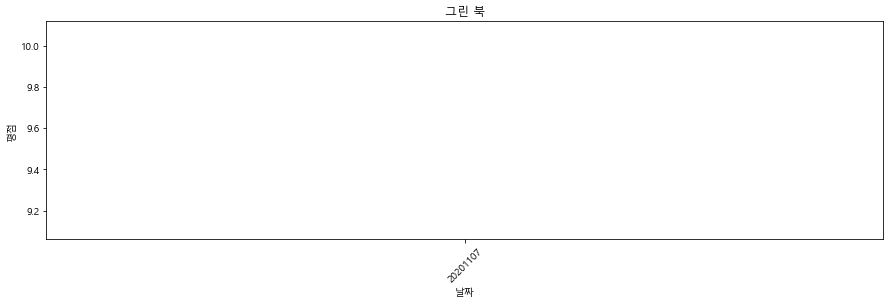

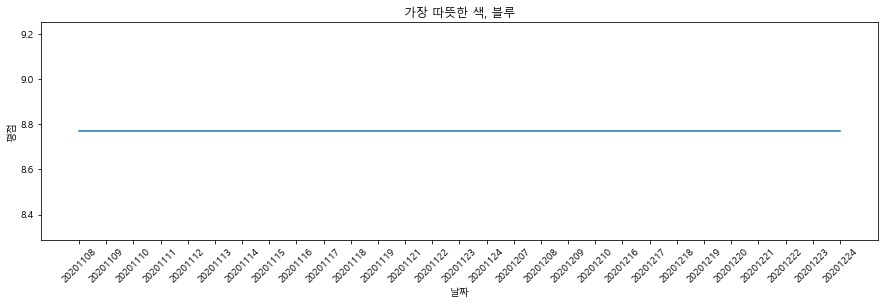

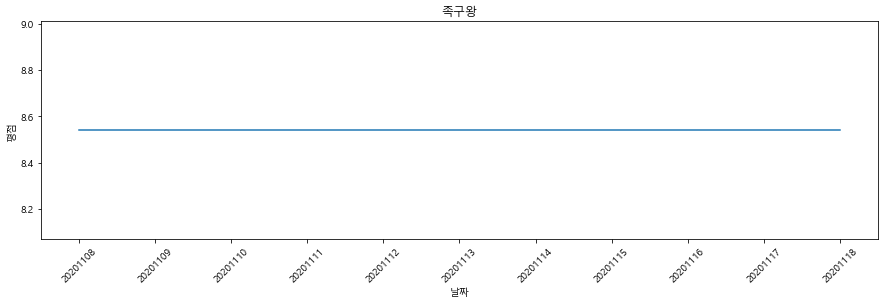

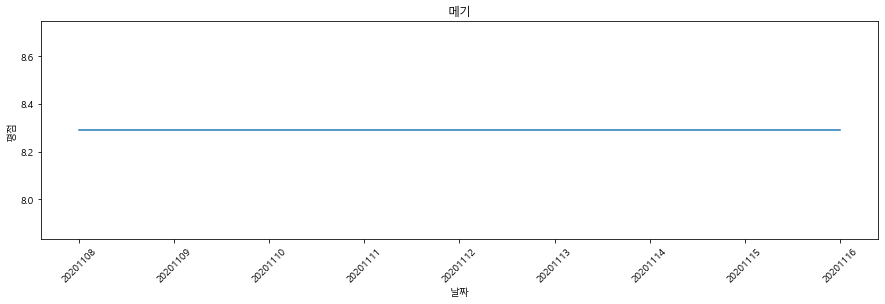

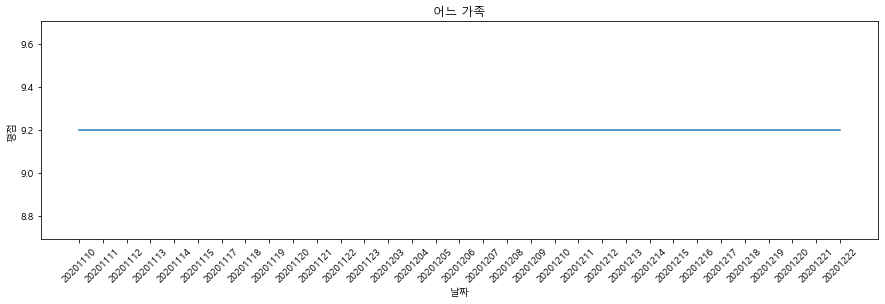

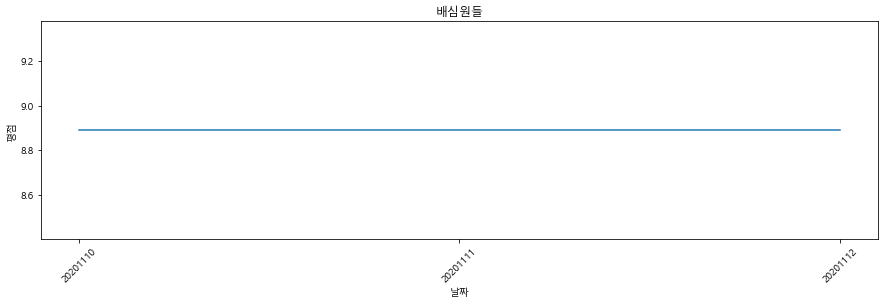

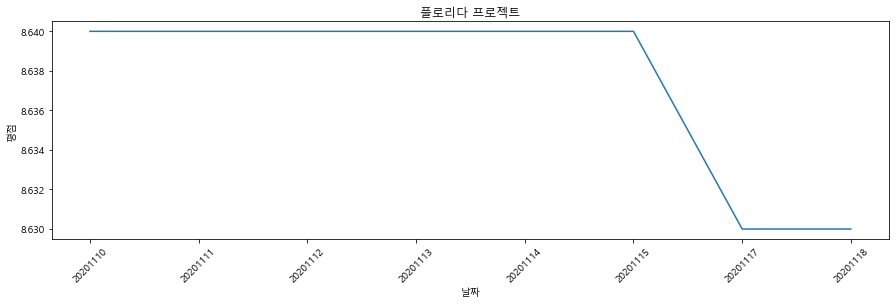

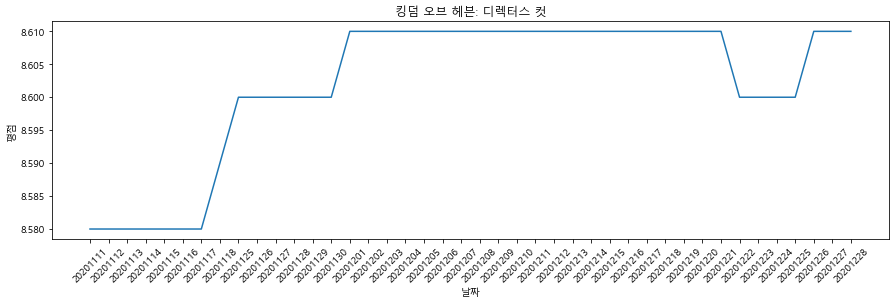

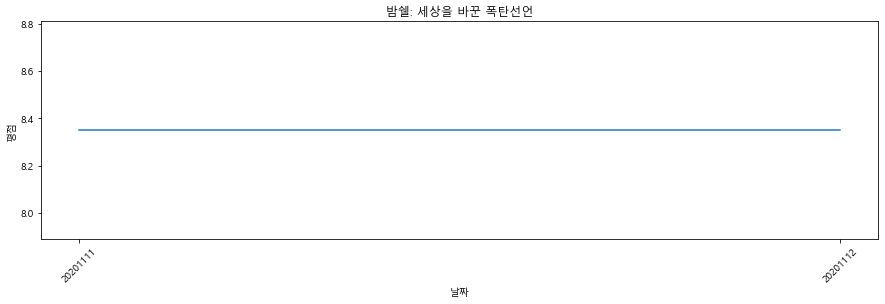

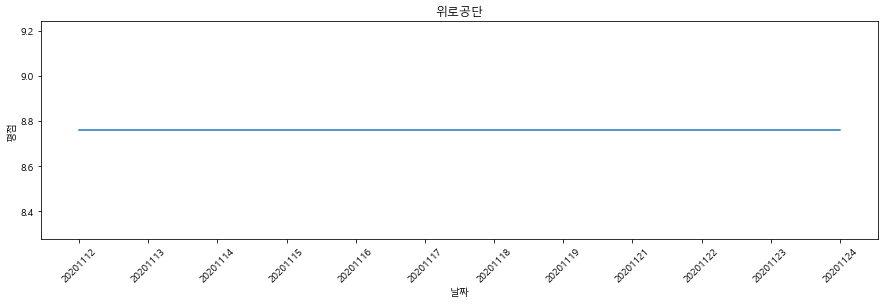

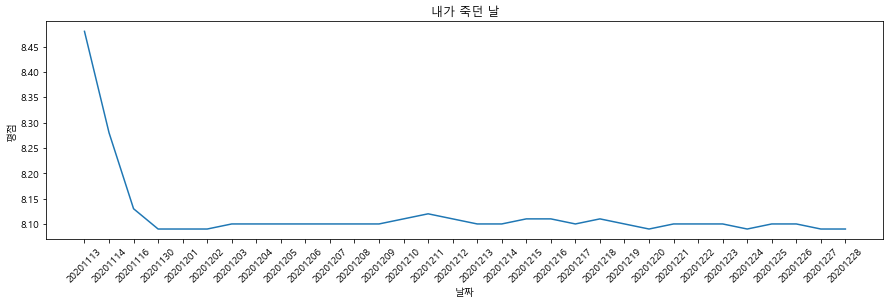

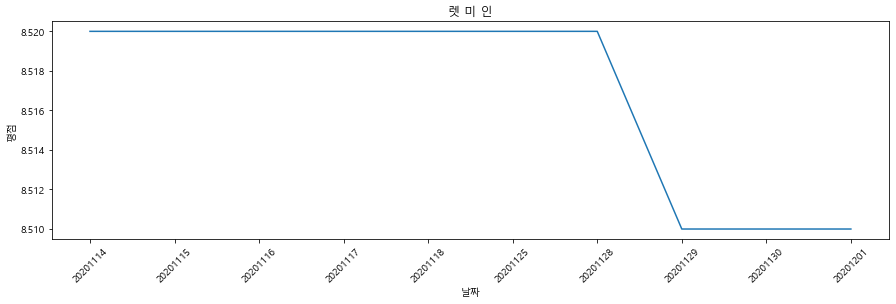

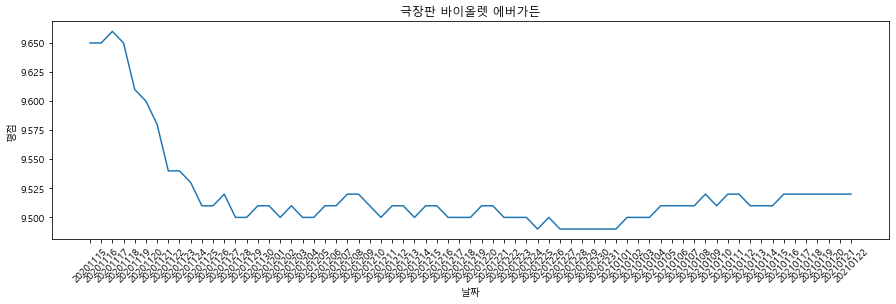

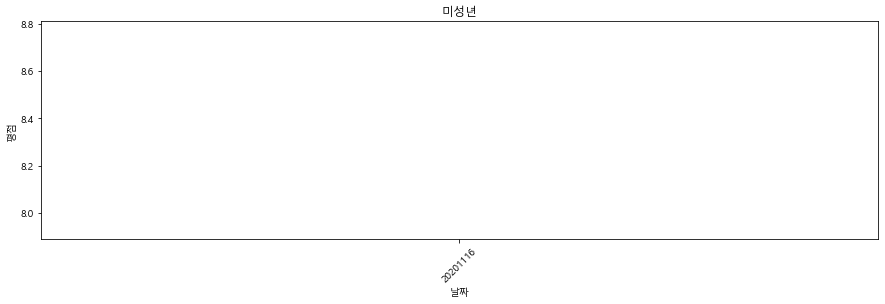

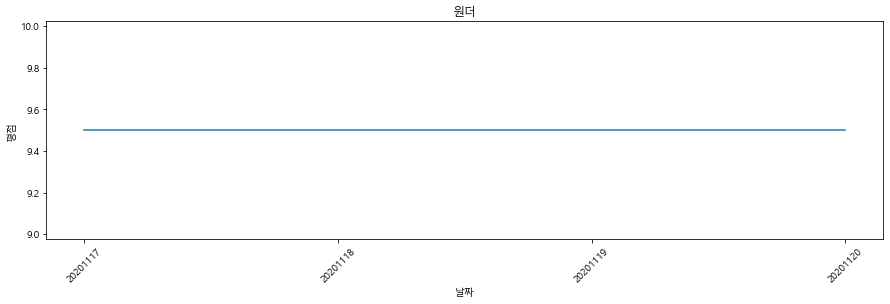

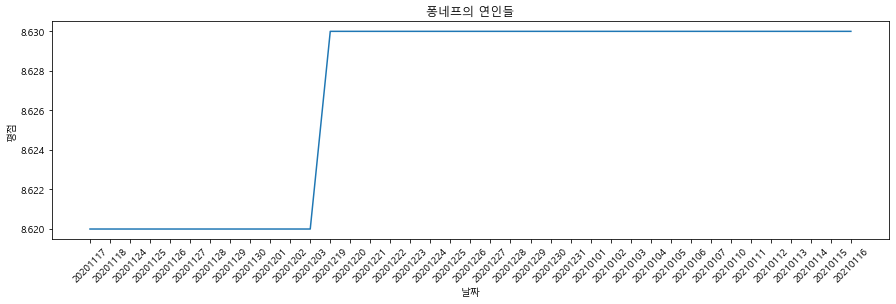

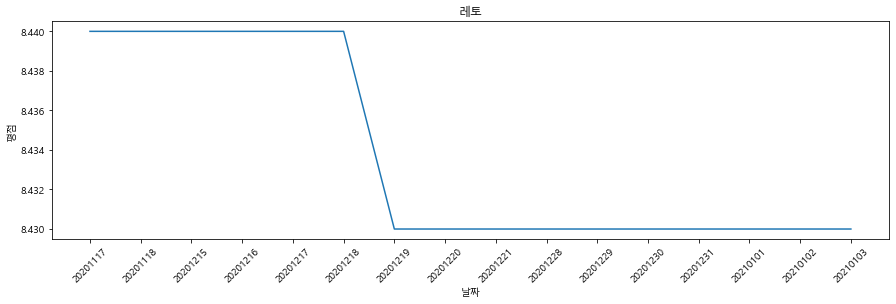

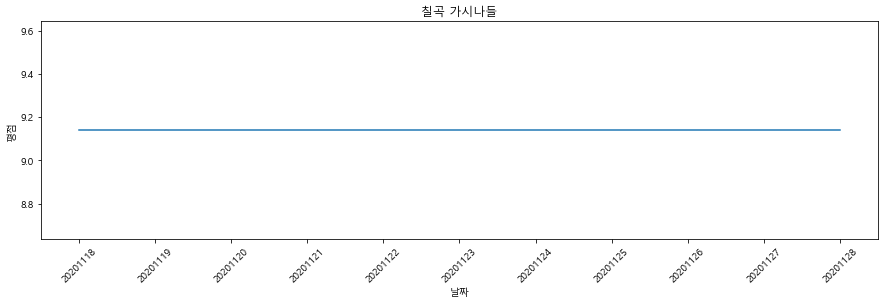

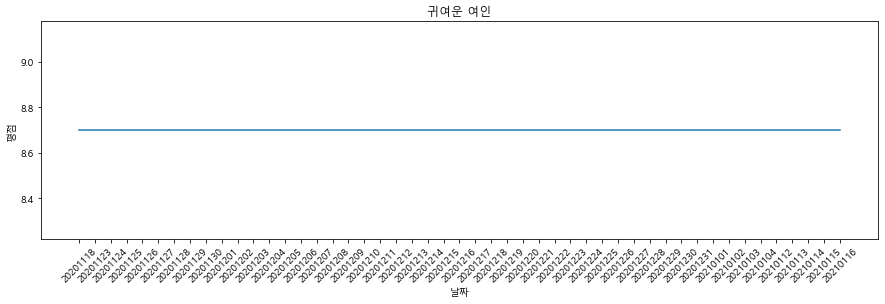

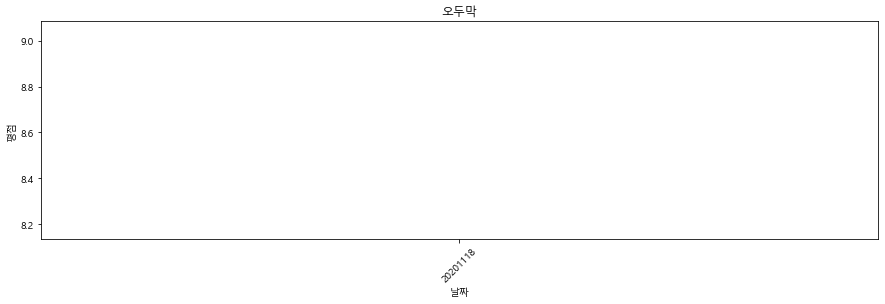

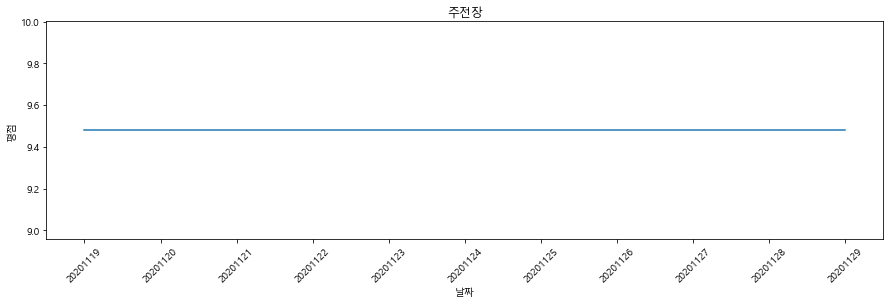

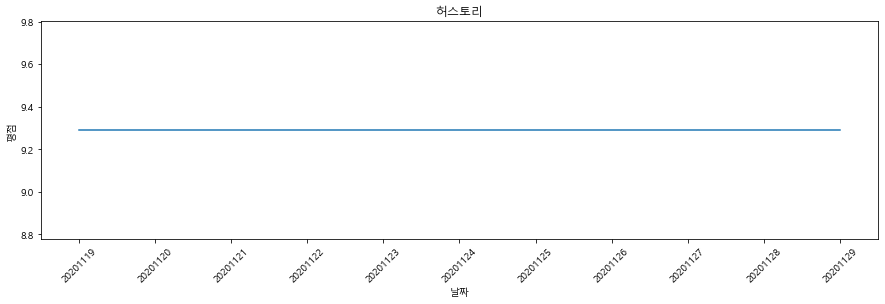

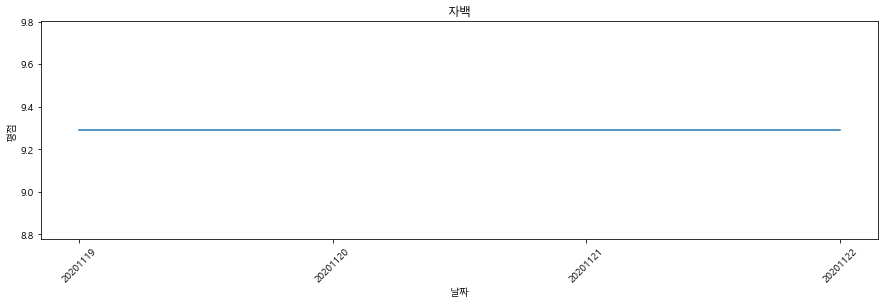

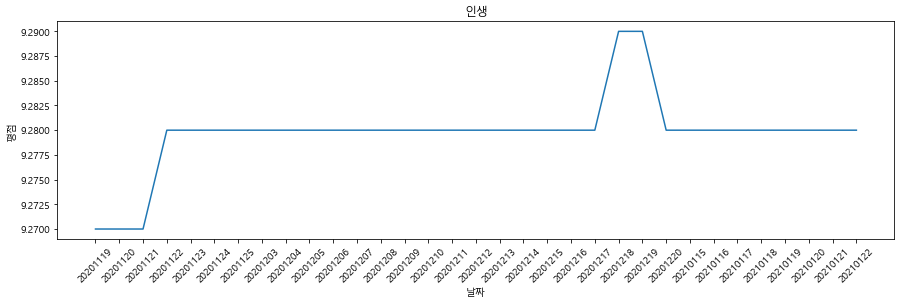

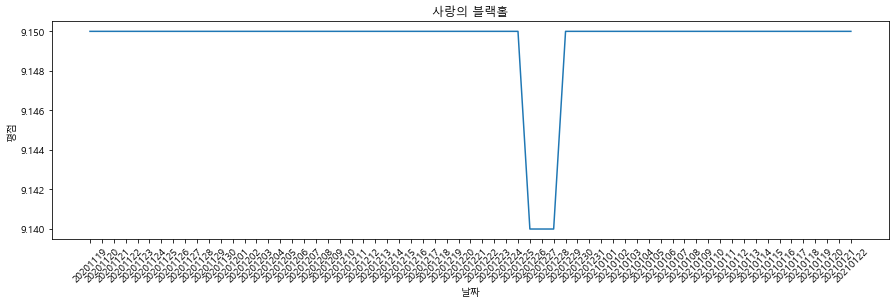

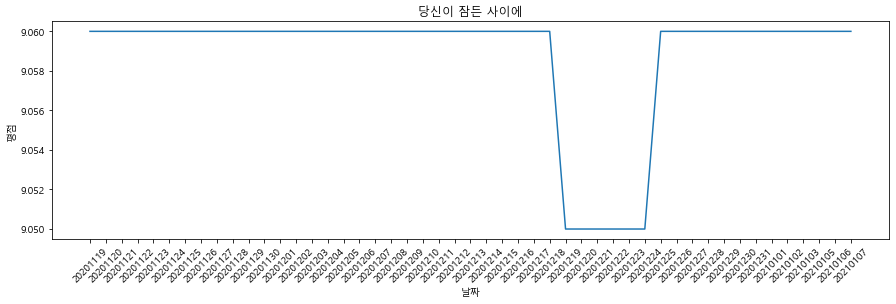

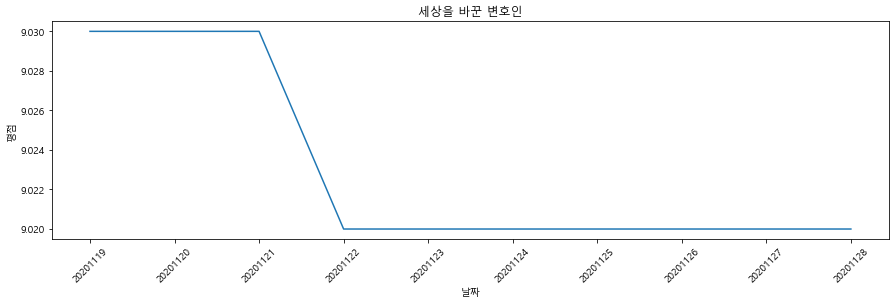

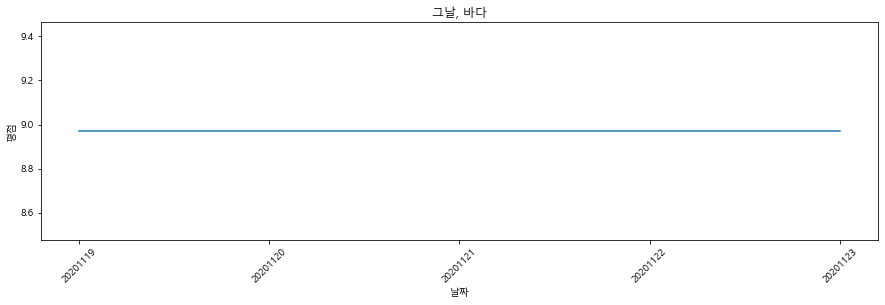

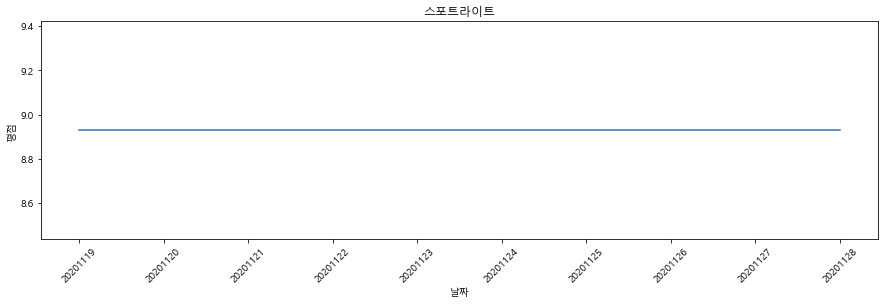

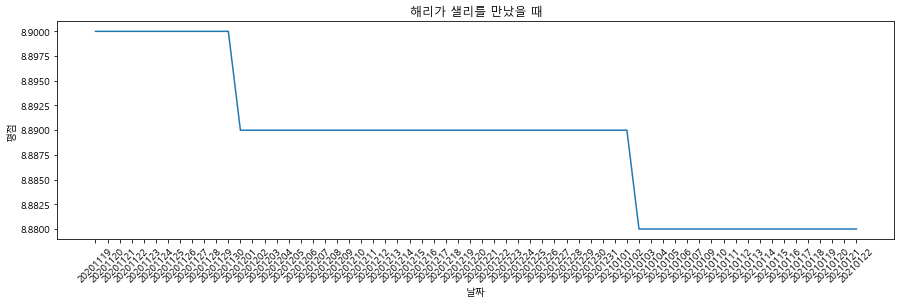

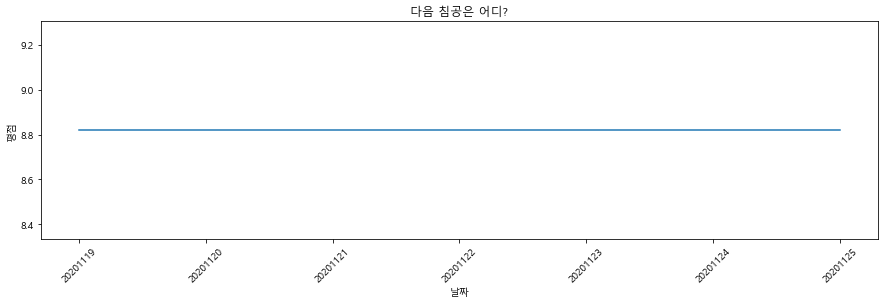

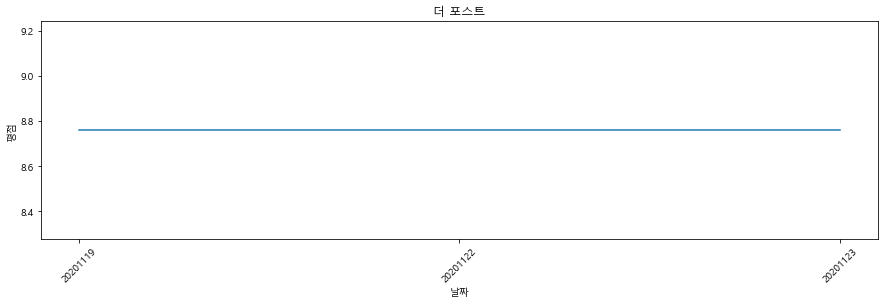

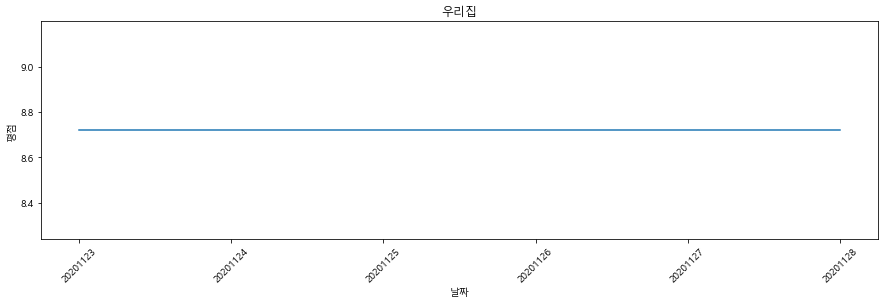

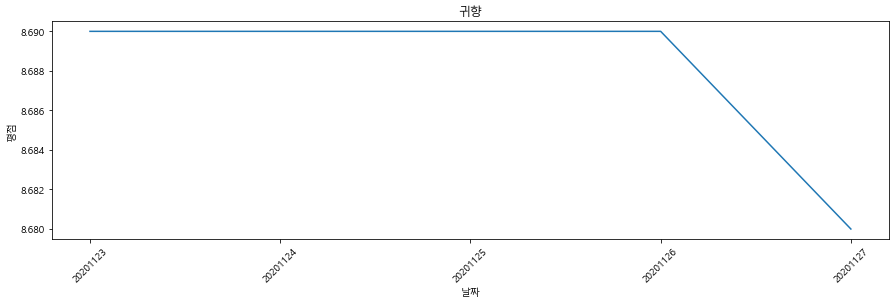

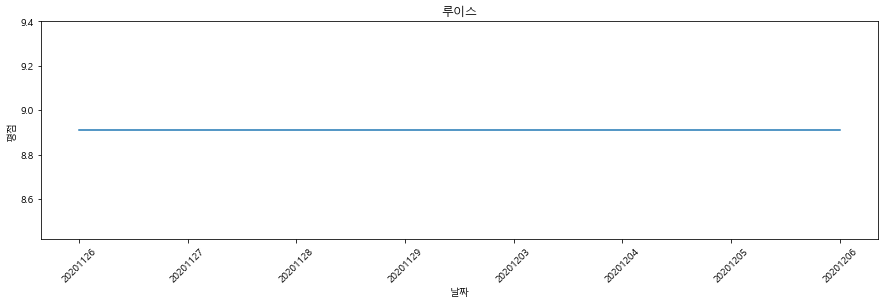

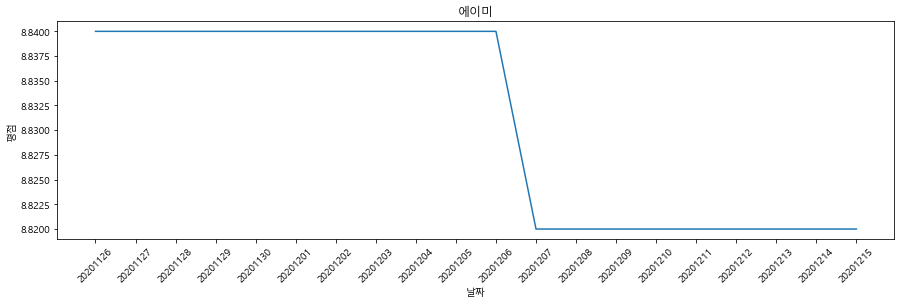

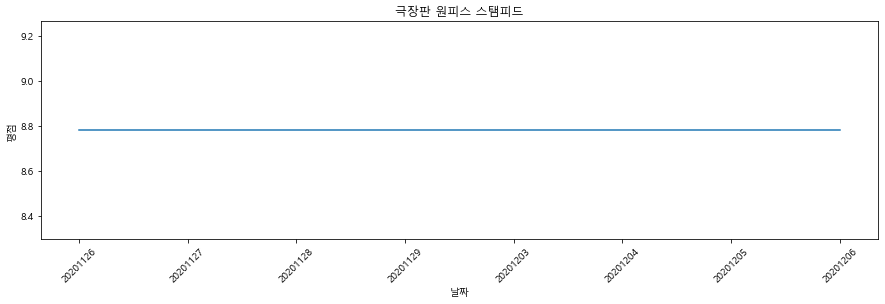

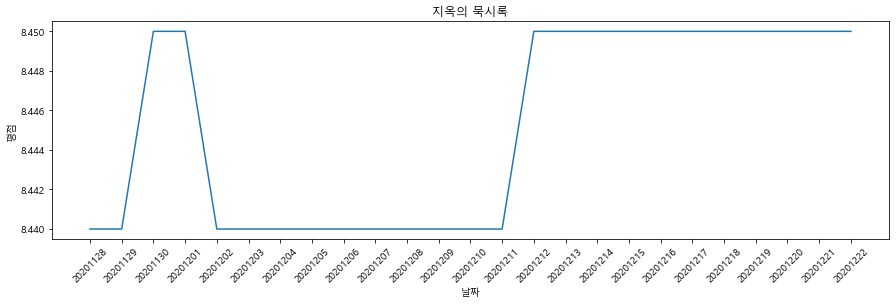

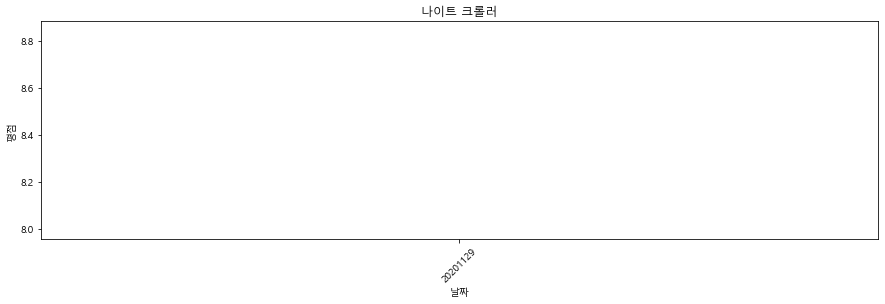

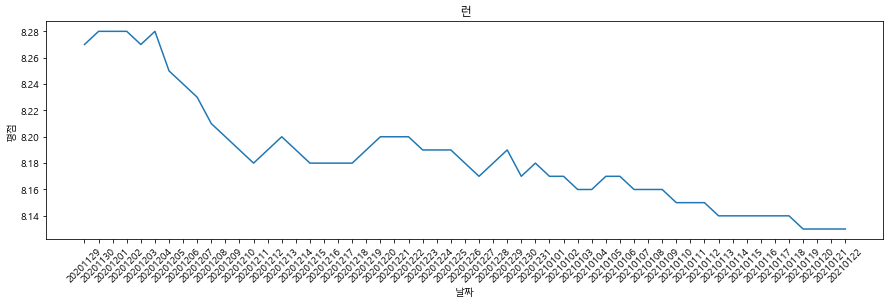

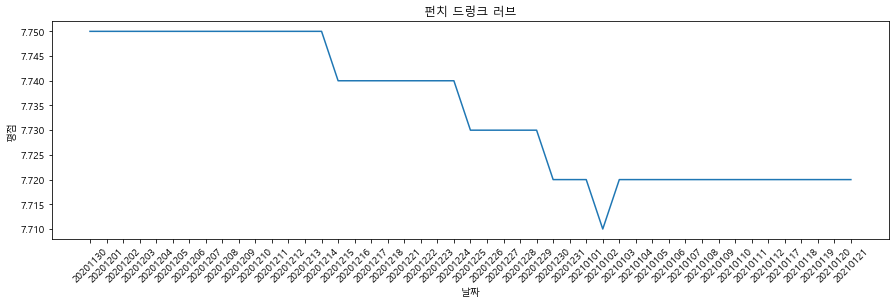

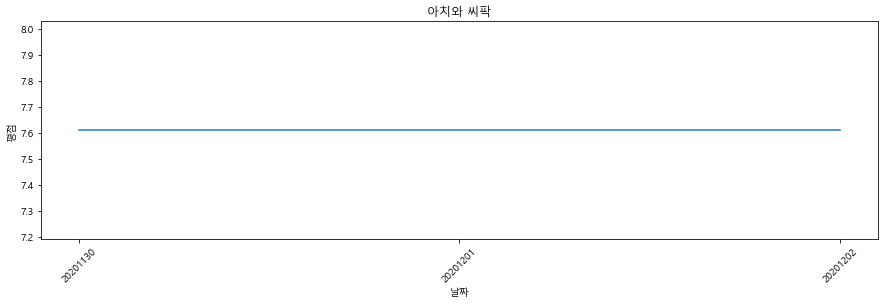

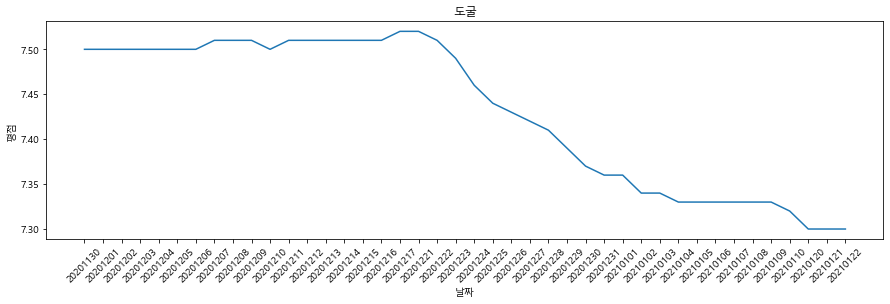

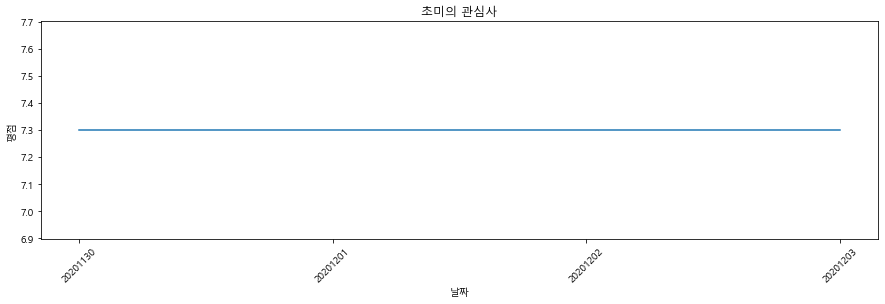

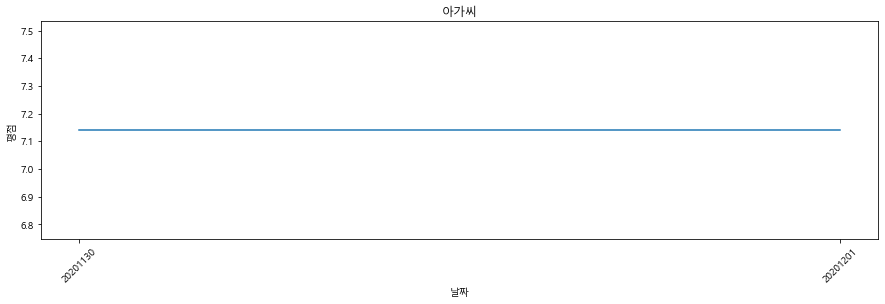

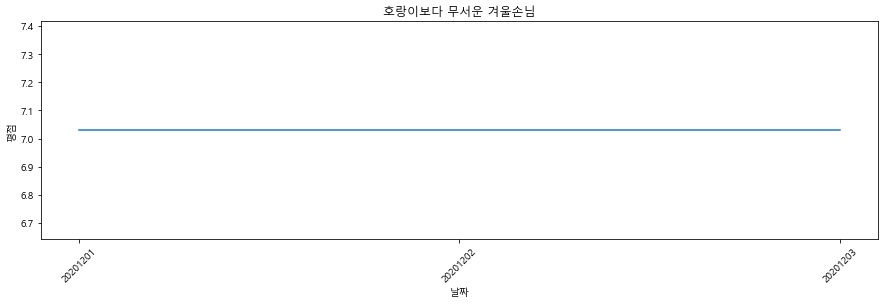

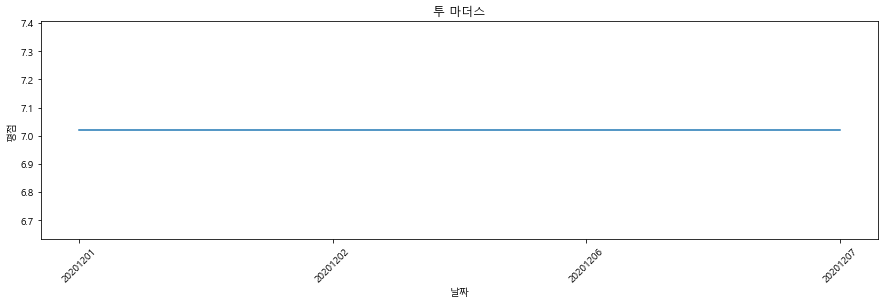

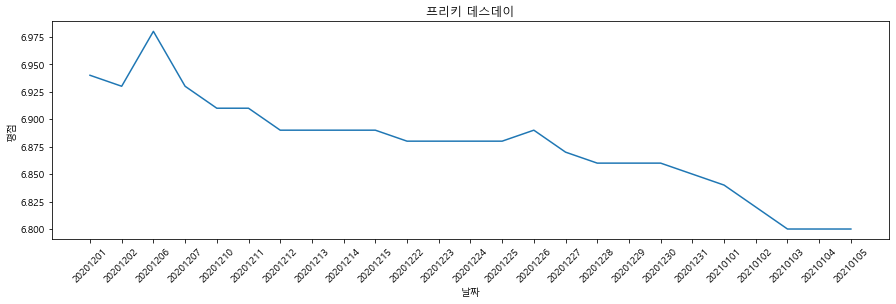

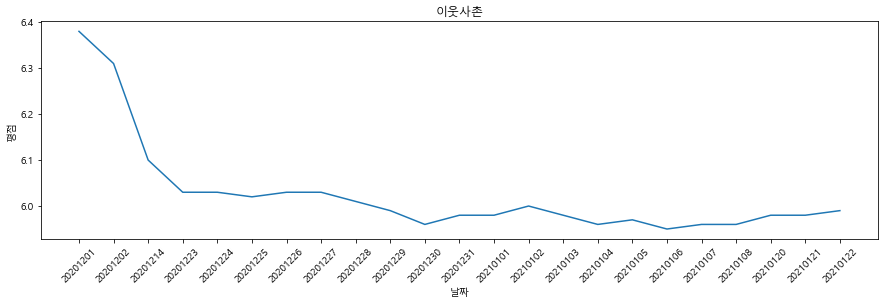

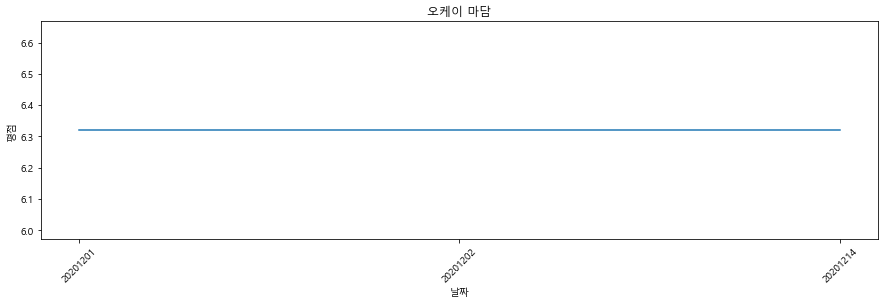

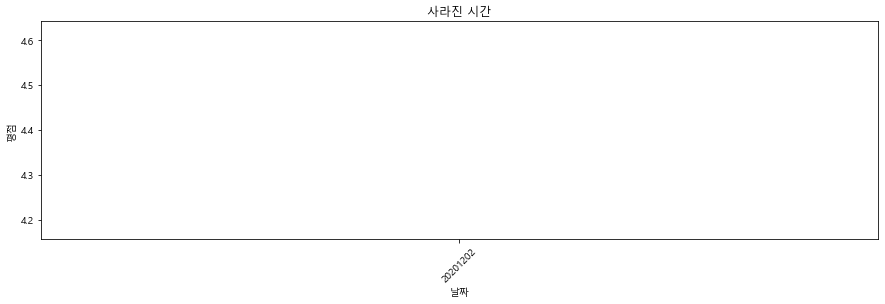

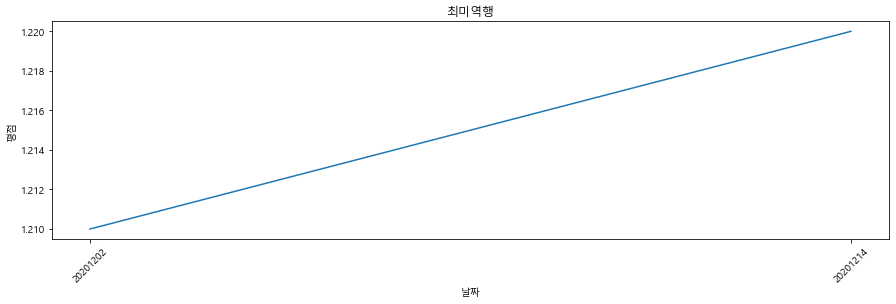

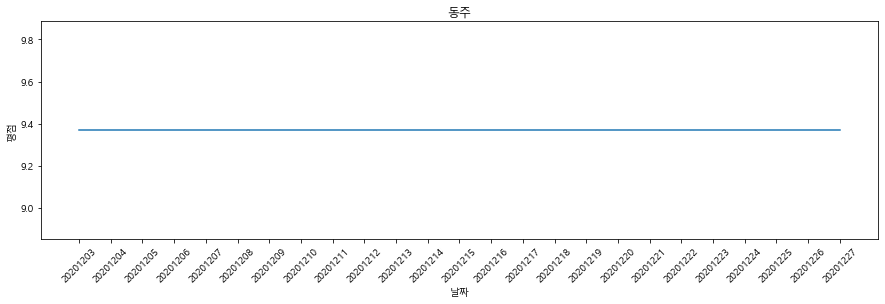

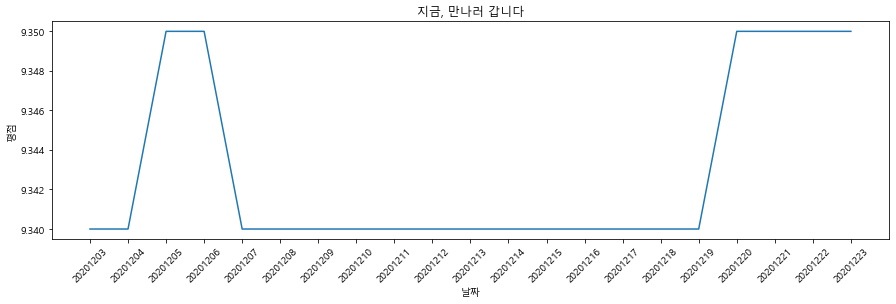

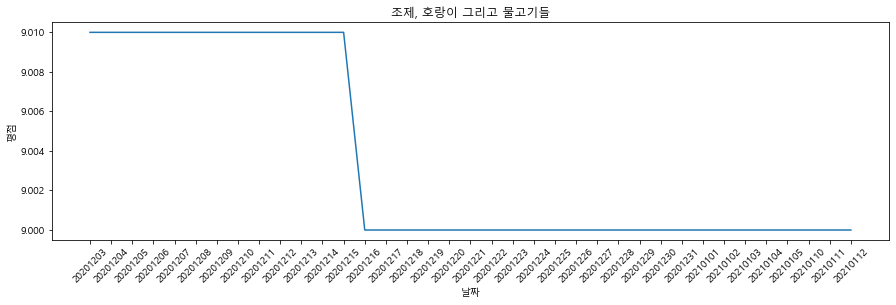

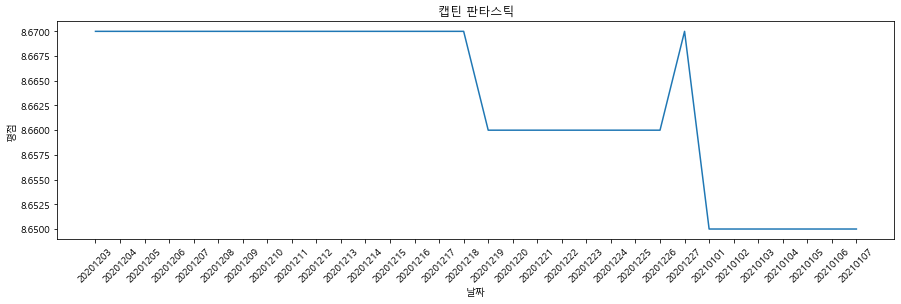

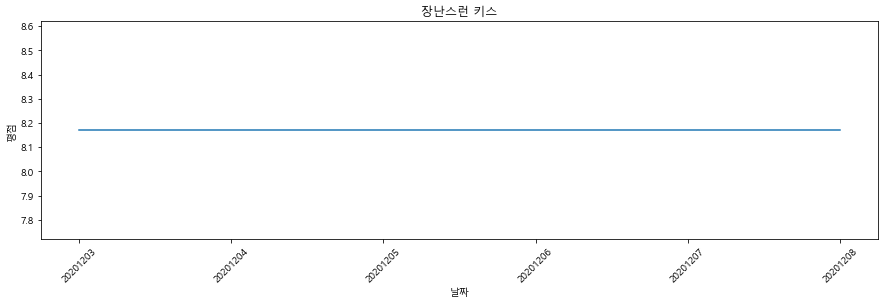

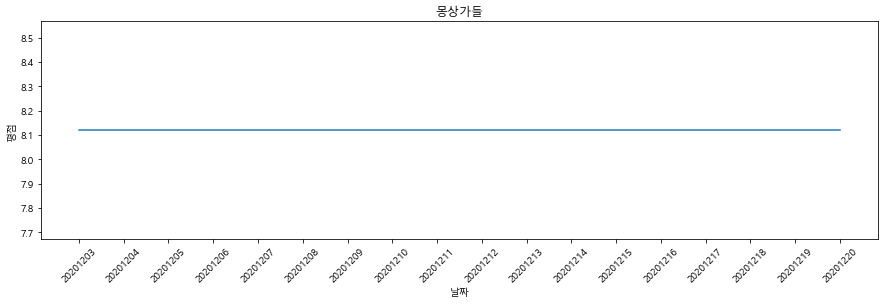

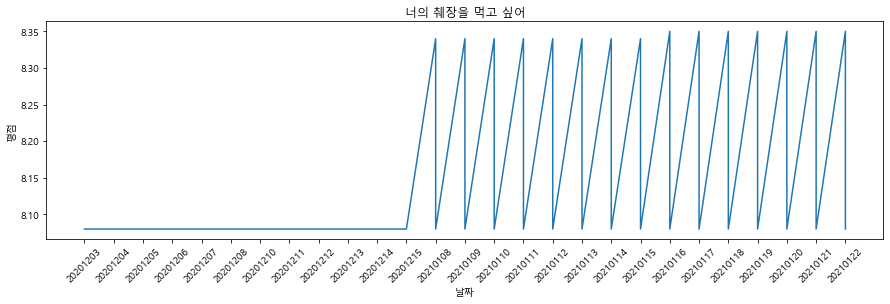

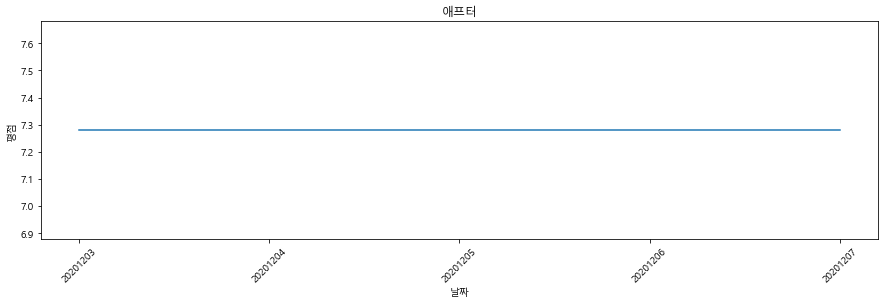

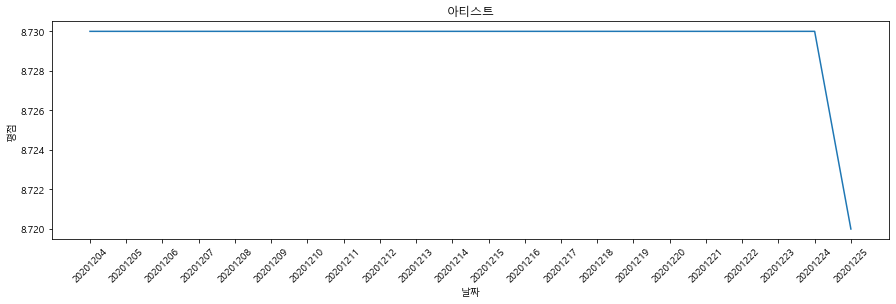

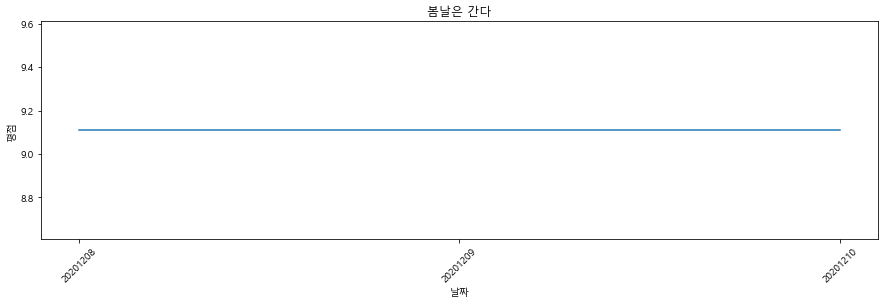

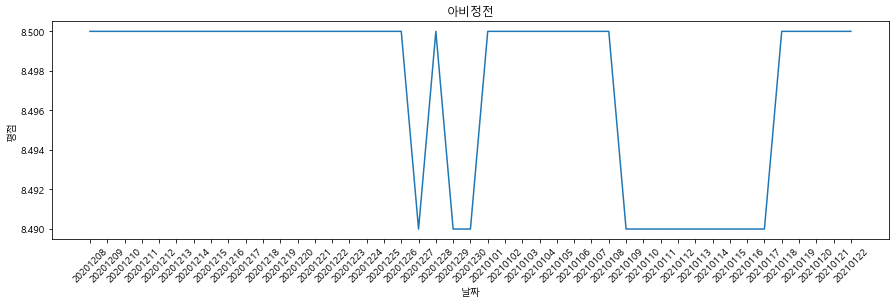

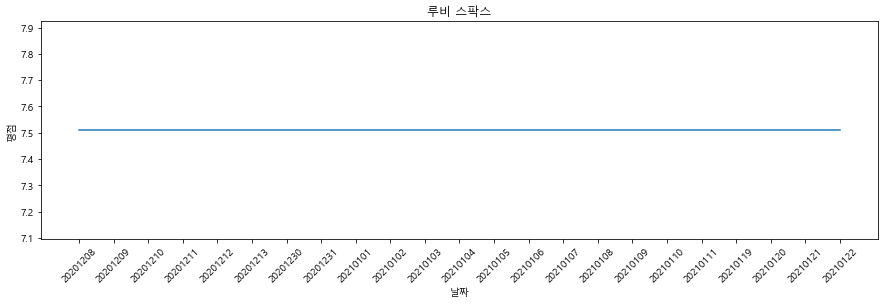

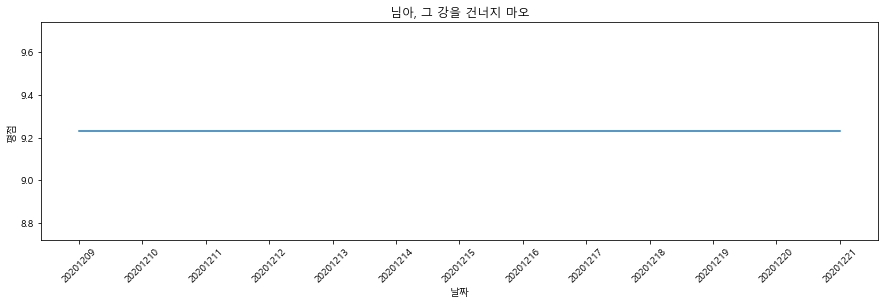

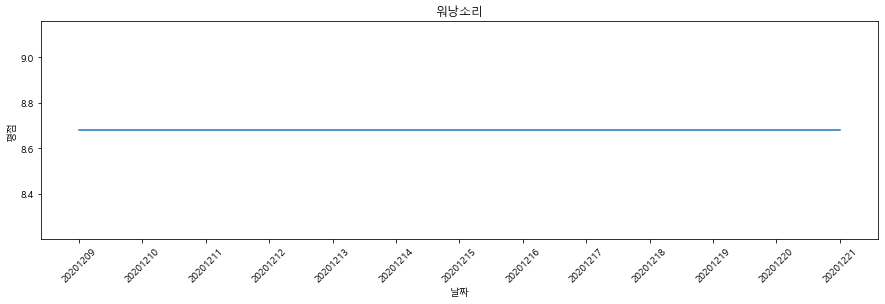

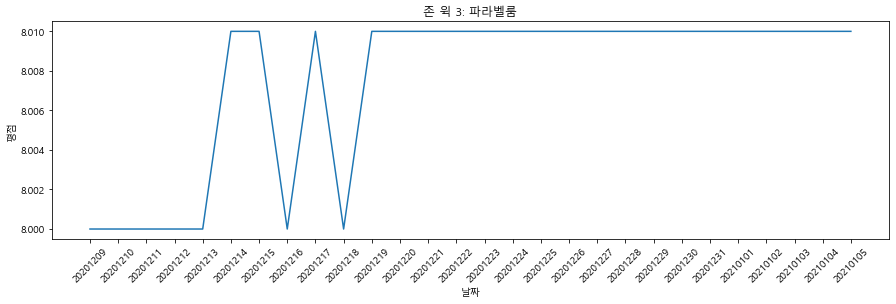

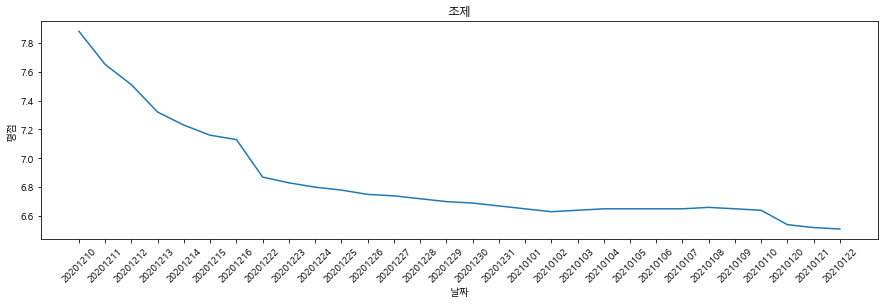

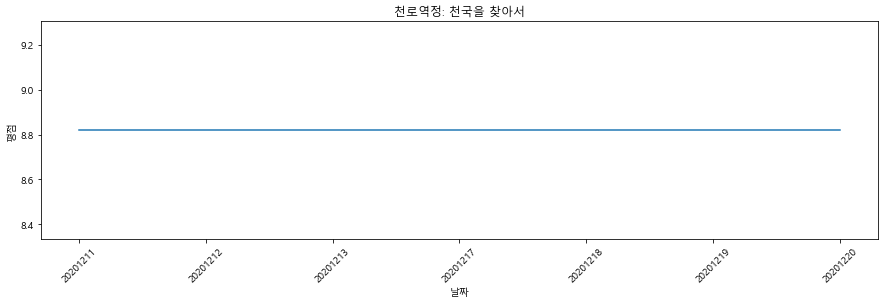

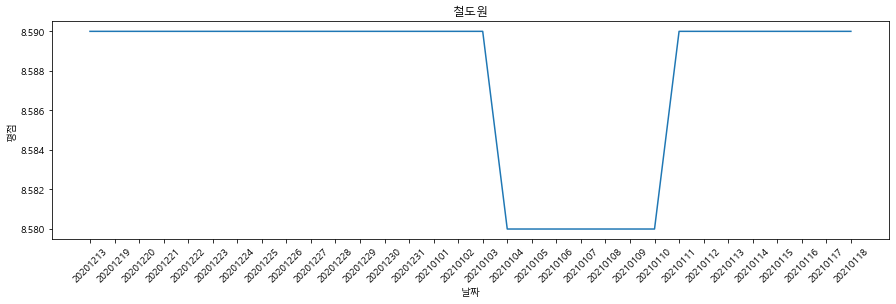

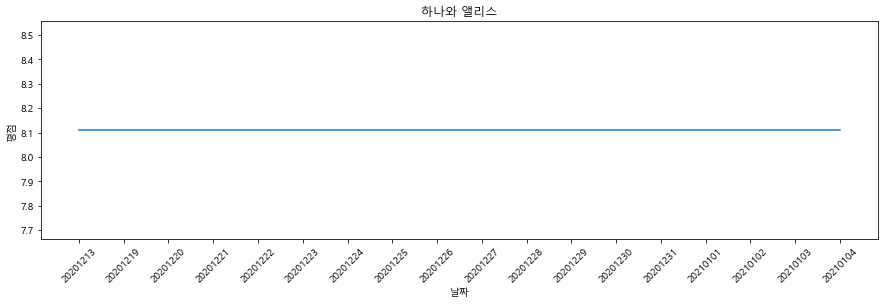

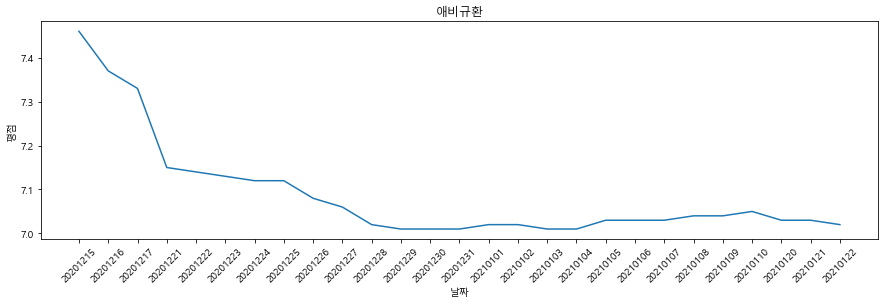

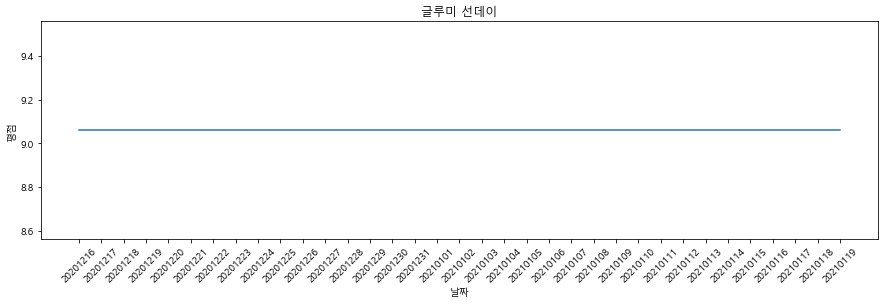

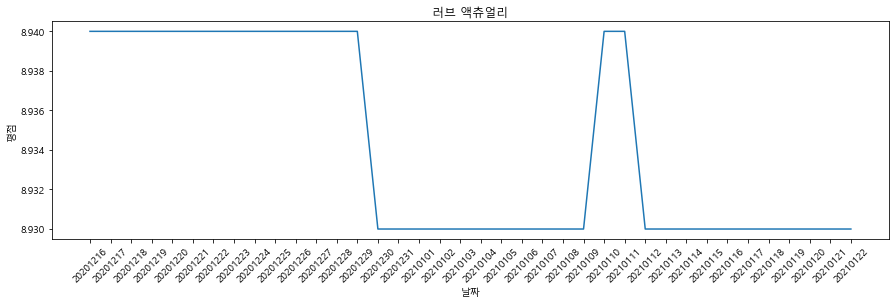

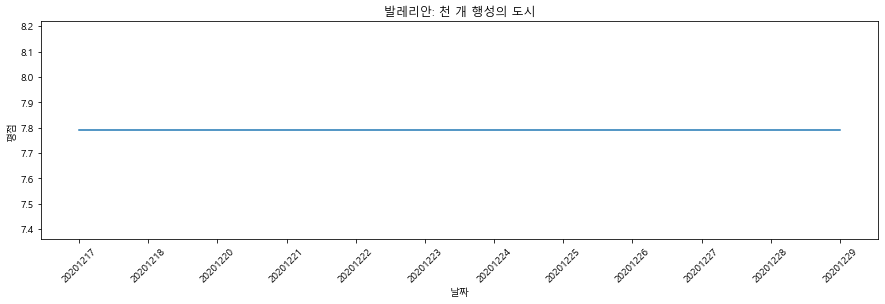

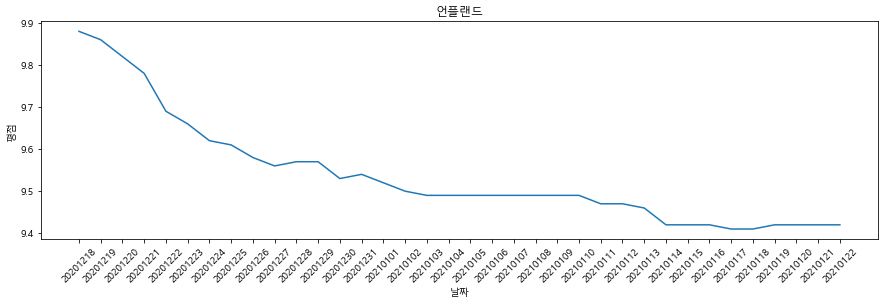

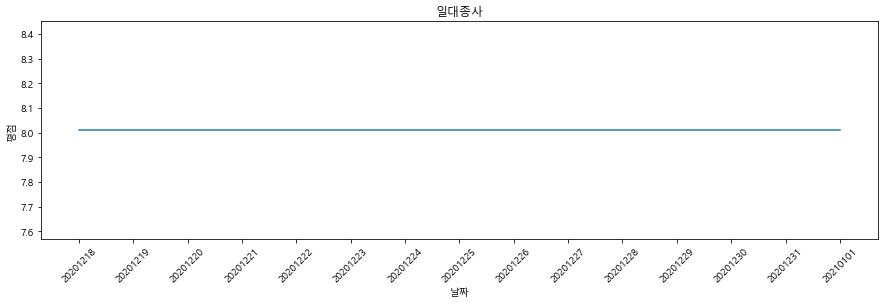

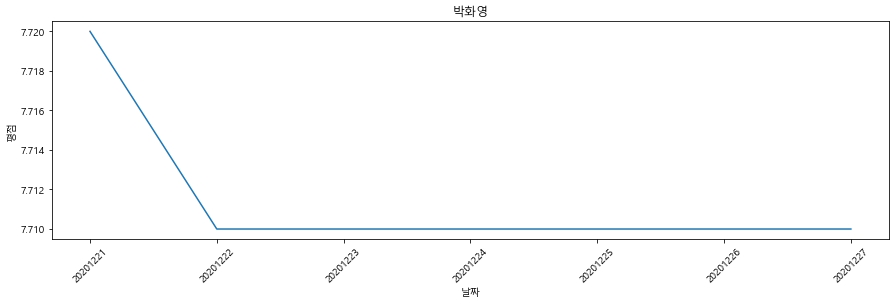

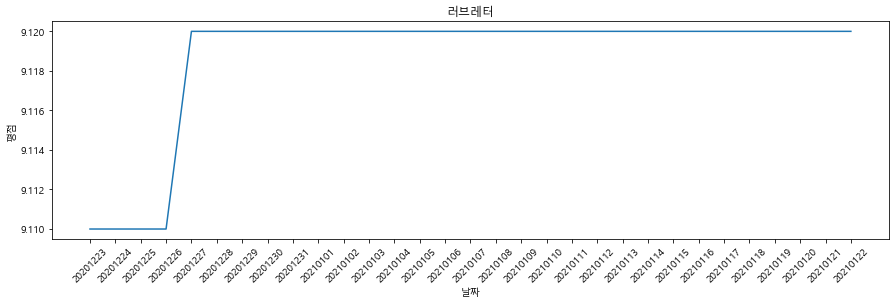

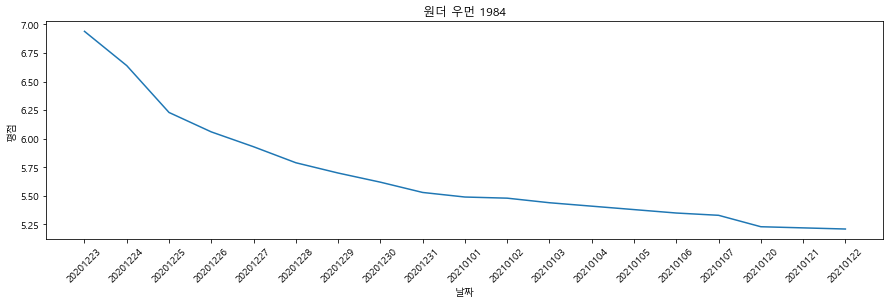

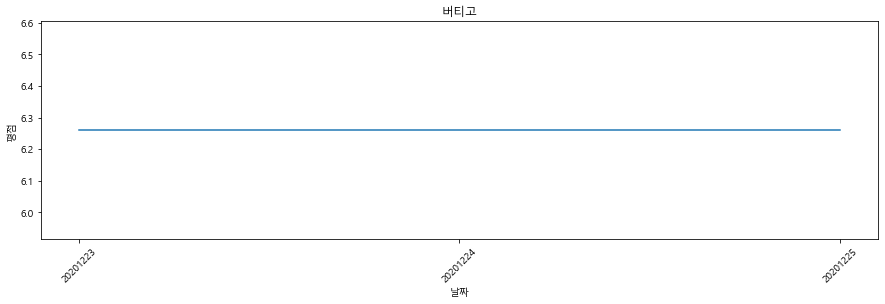

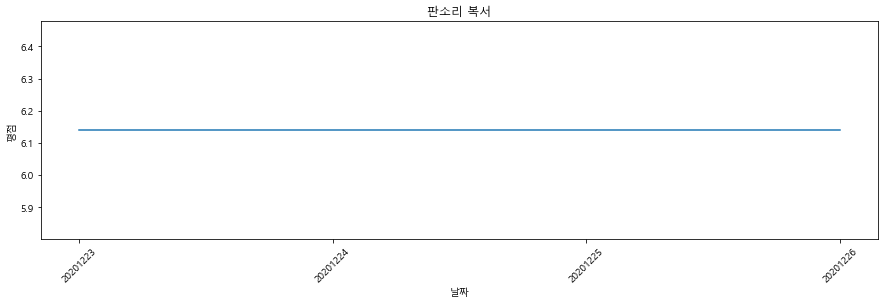

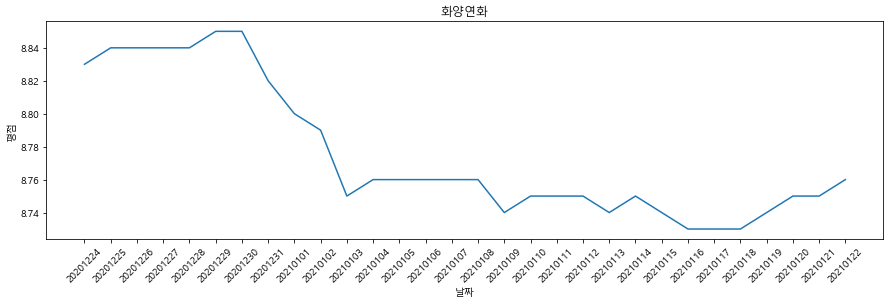

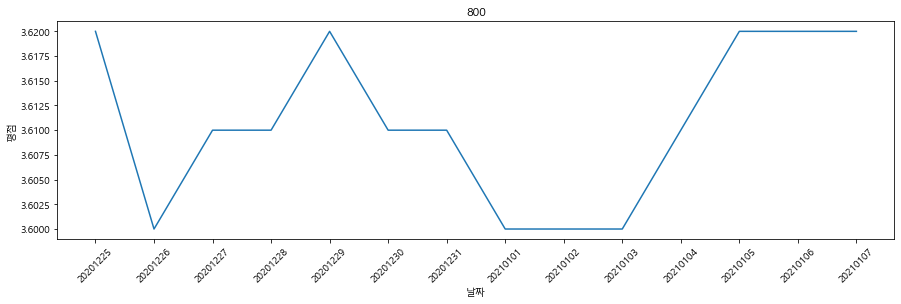

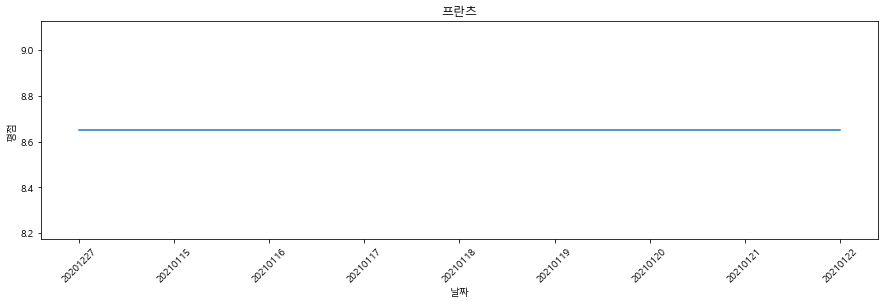

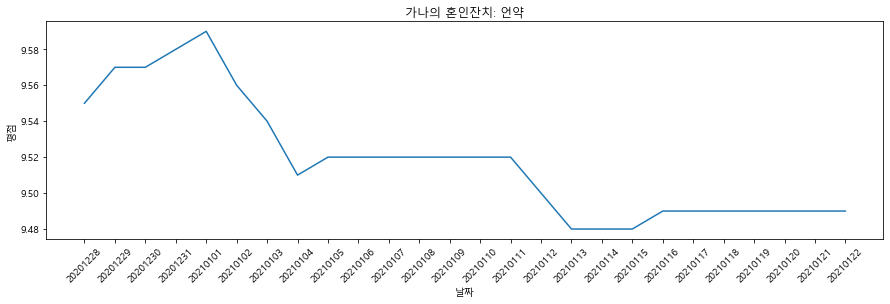

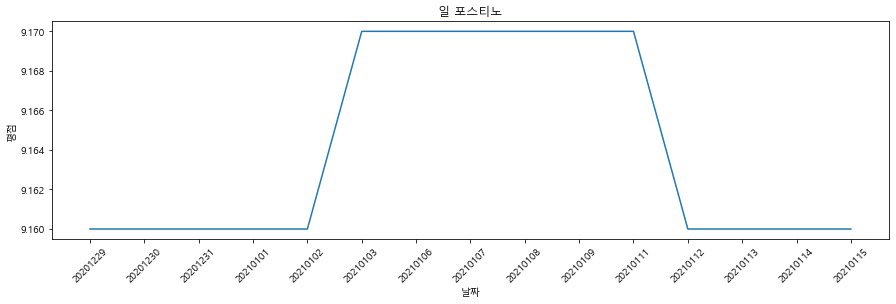

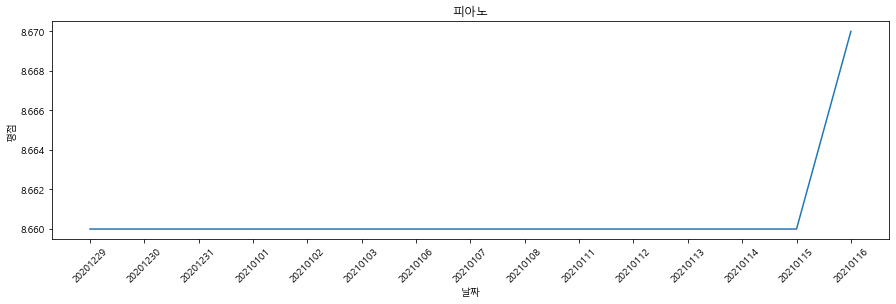

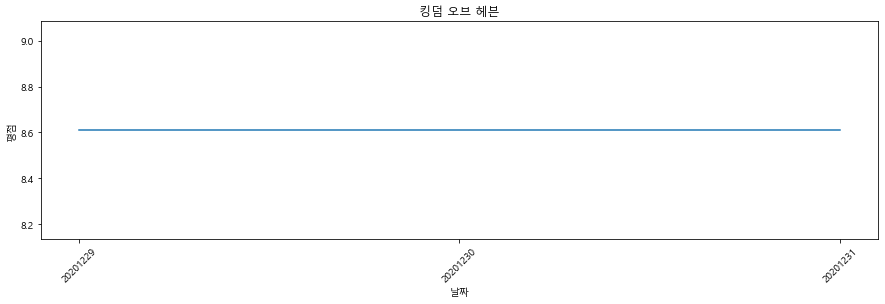

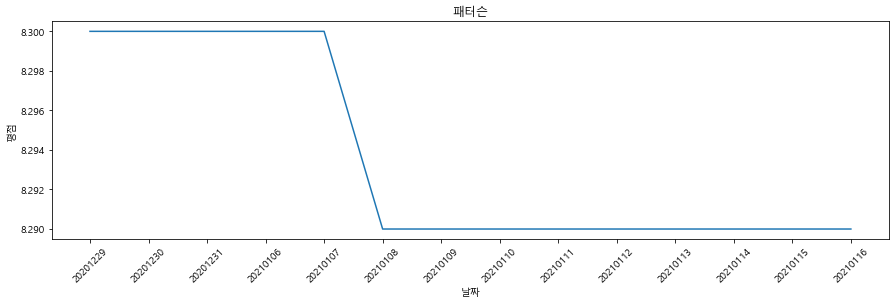

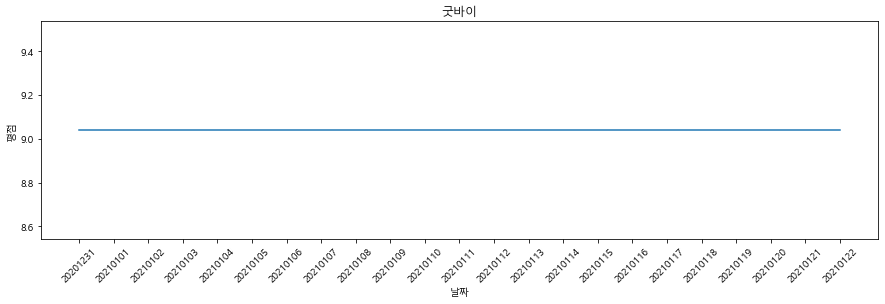

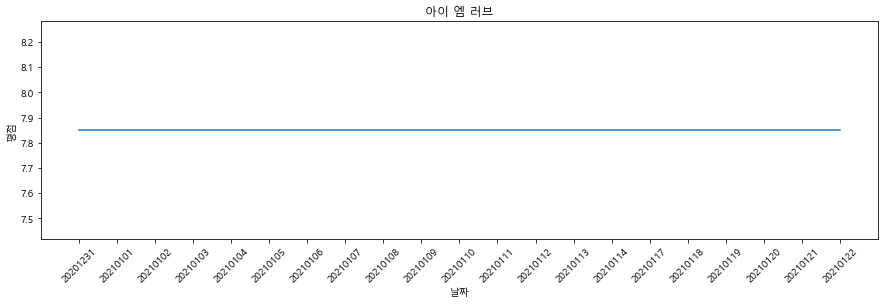

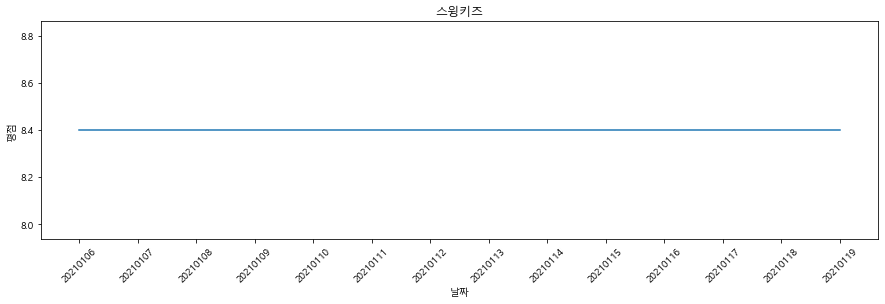

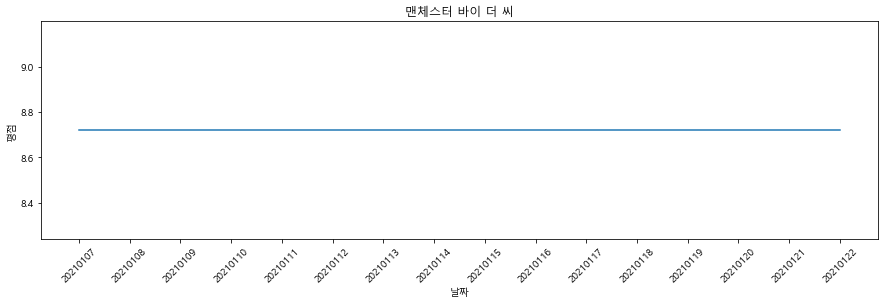

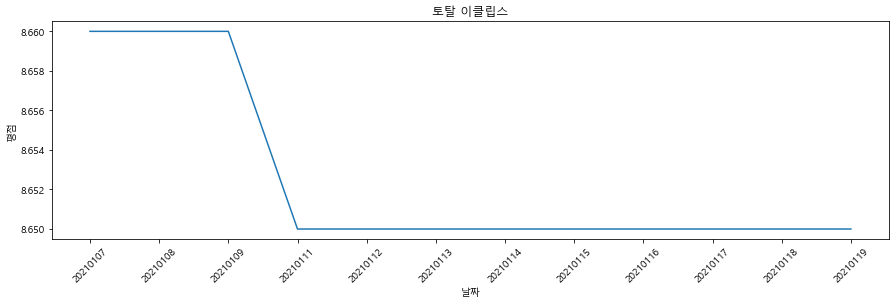

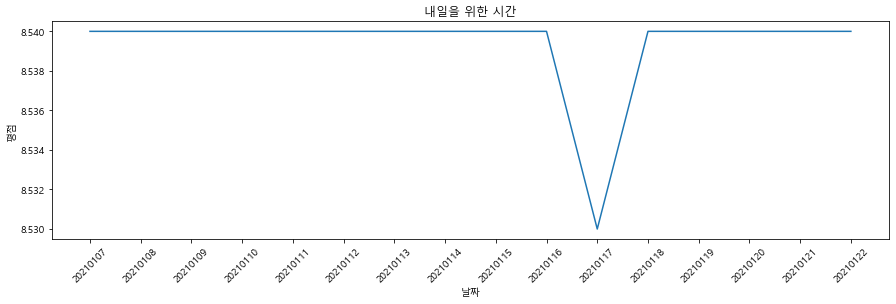

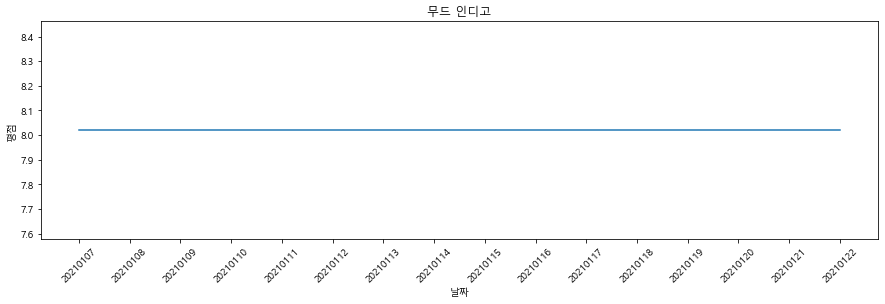

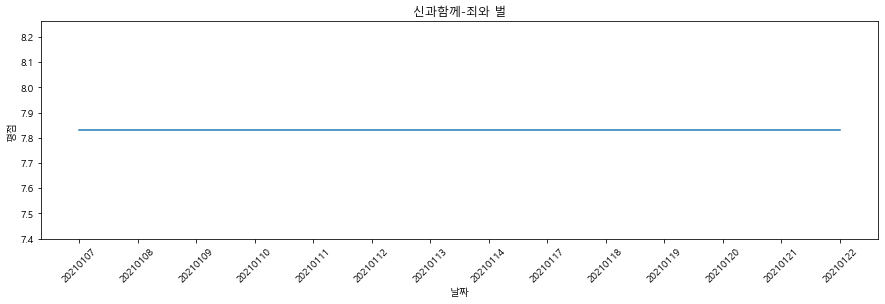

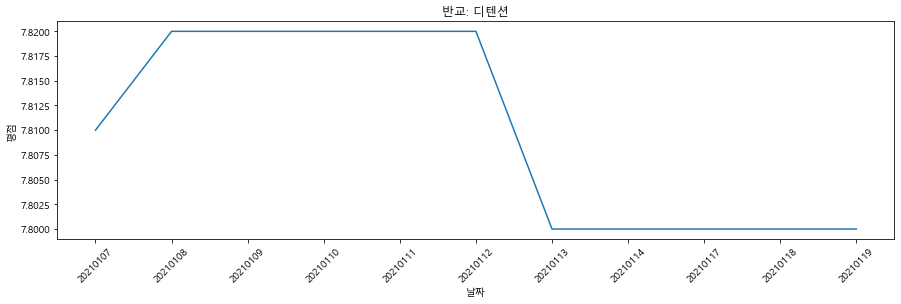

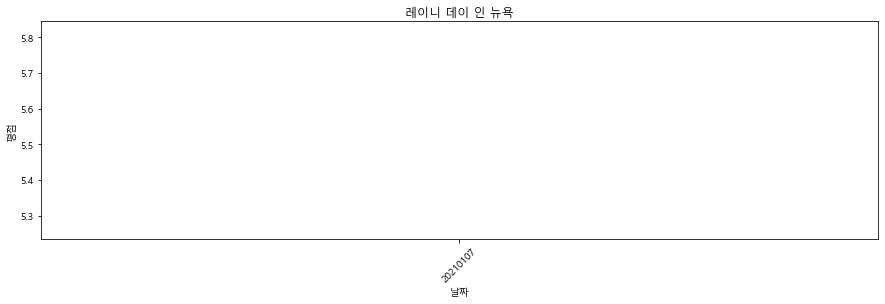

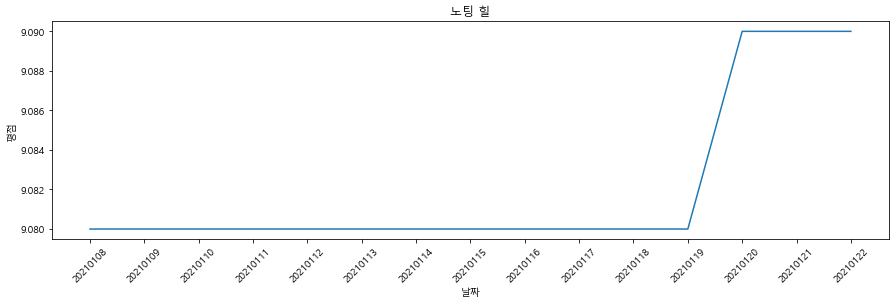

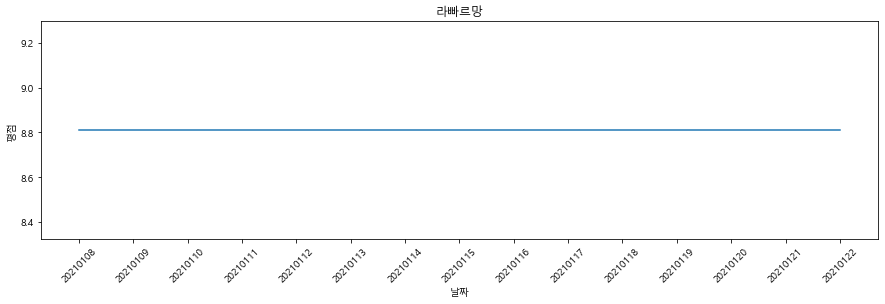

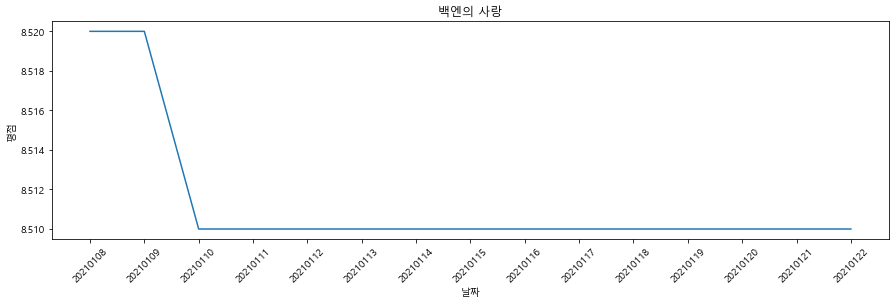

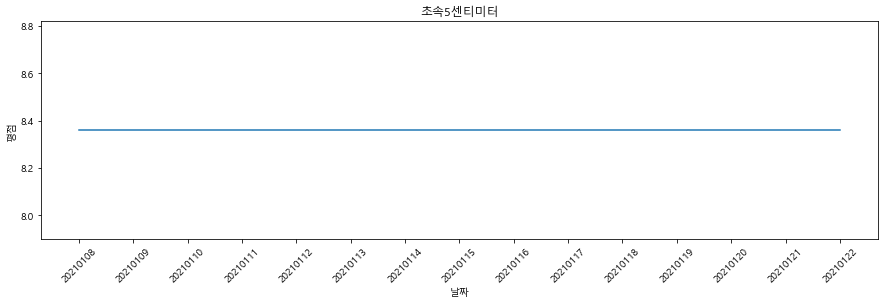

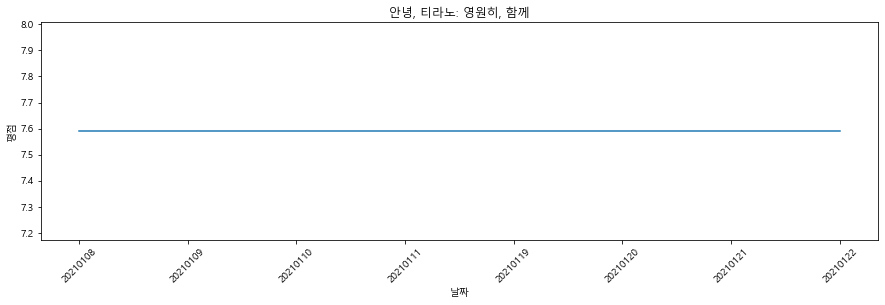

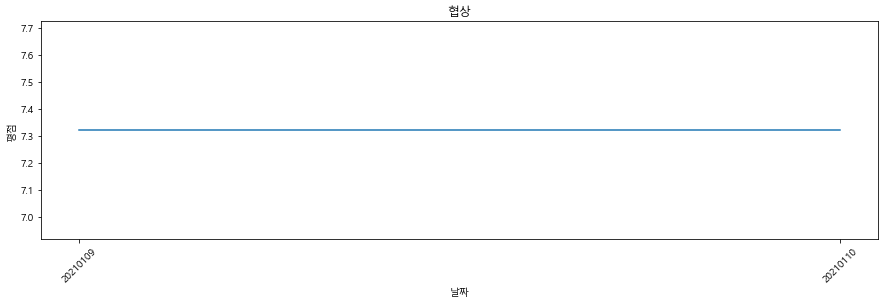

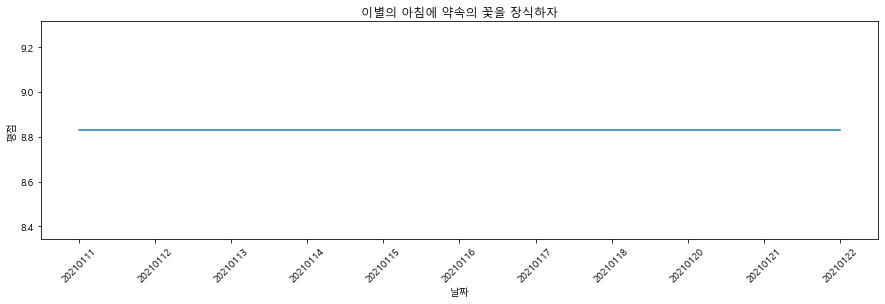

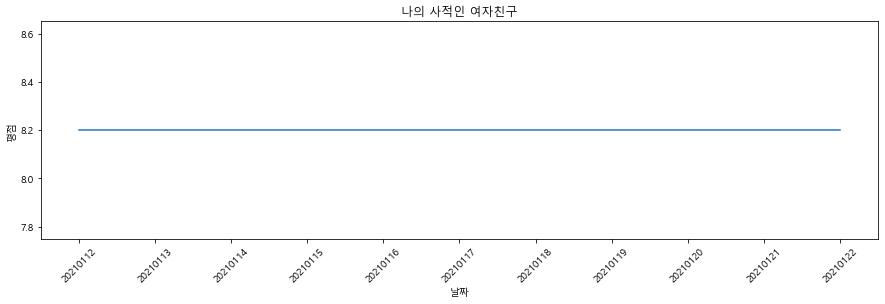

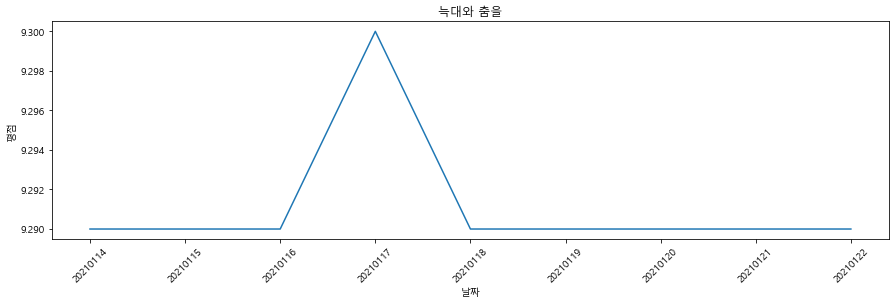

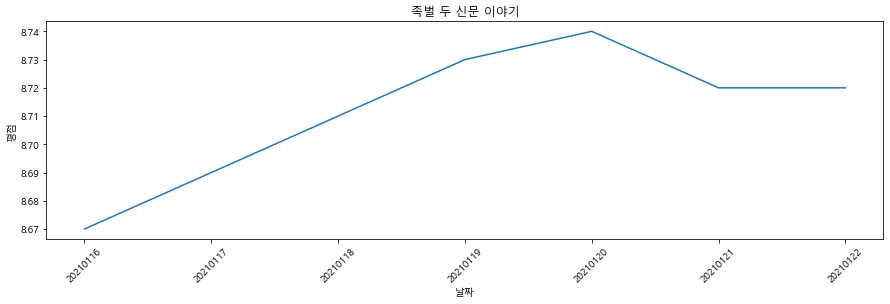

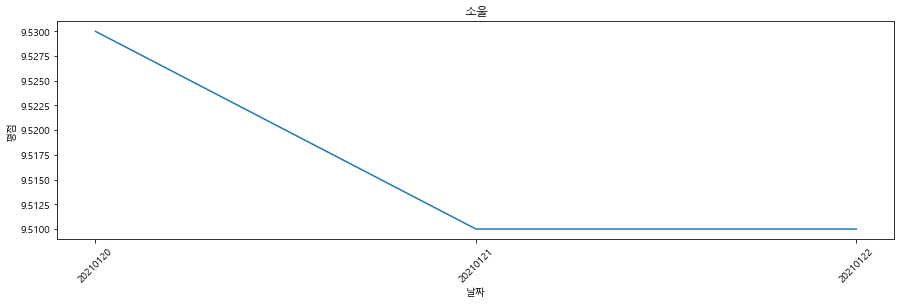

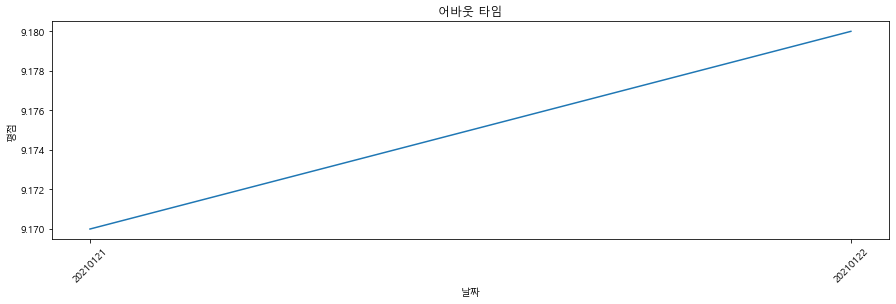

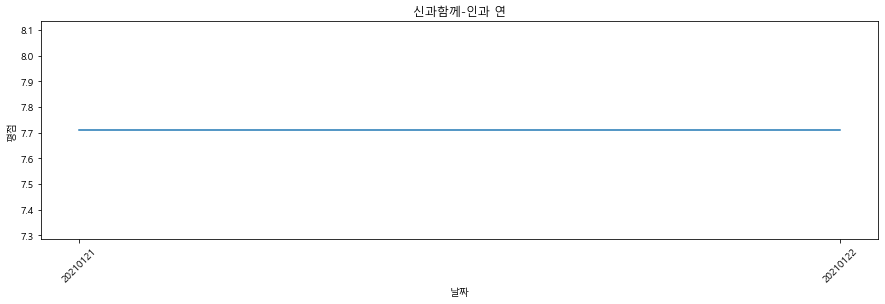

In [140]:
# 영화명 리스트
movie_title = total_movie_df['영화명'].unique()

for name in movie_title:
    draw_graph(name)